In [1]:

import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.colors as mcolors
import matplotlib.cm as cm
#rc('font',**{'family':'serif','serif':['Times New Roman']})
#rc('text', usetex=True)



In [2]:
import torch

print(torch.__version__)

print(torch.__file__)

inputs = torch.randn(10, 3, 224, 224).to('cuda')  #* Example tensor
print(inputs.device) 

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("using", device, "device") 

print(torch.cuda.current_device())
print(torch.cuda.get_device_name(torch.cuda.current_device()))
print(torch.cuda.is_available())

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from PIL import Image

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from __future__ import division, print_function
import sys
from sklearn.preprocessing import MinMaxScaler


2.3.1+cu121
c:\Users\oscar\anaconda3\envs\NN\Lib\site-packages\torch\__init__.py
cuda:0
using cuda device
0
NVIDIA GeForce 930MX
True


In [3]:
class FCN(nn.Module):
    "Defines a connected network"
    
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.Tanh
        self.fcs = nn.Sequential(*[
                        nn.Linear(N_INPUT, N_HIDDEN),
                        activation()])
        self.fch = nn.Sequential(*[
                        nn.Sequential(*[
                            nn.Linear(N_HIDDEN, N_HIDDEN),
                            activation()]) for _ in range(N_LAYERS-1)])
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)
        
    def forward(self, x):
        x = self.fcs(x)
        x = self.fch(x)
        x = self.fce(x)
        return x
    

In [4]:
class FCND(nn.Module):
    "Defines a connected network"
    
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.Tanh
        self.fcs = nn.Sequential(*[
                        nn.Linear(N_INPUT, N_HIDDEN),
                        activation()])
        self.fch = nn.Sequential(*[
                        nn.Sequential(*[
                            nn.Linear(N_HIDDEN, N_HIDDEN),
                            activation()]) for _ in range(N_LAYERS-1)])
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)

        self.gamma = nn.Parameter(data=torch.tensor([0.]))
        self.beta = nn.Parameter(data=torch.tensor([0.]))
        
    def forward(self, x):
        x = self.fcs(x)
        x = self.fch(x)
        x = self.fce(x)
        return x

In [5]:
def plot_result(i, x, y, x_data, y_data, yh, xp=None):
    "Pretty plot training results"
    plt.figure(figsize=(15,7))
    
    plt.plot(x, yh[:, 0], color="tab:red", linewidth=2, alpha=0.8, label="NN S")
    plt.plot(x, yh[:, 1], color="tab:green", linewidth=2, alpha=0.8, label="NN I")
    plt.plot(x, yh[:, 2], color="tab:blue", linewidth=2, alpha=0.8, label="NN R")
    plt.plot(x, y[:, 0], color="red", linewidth=2, alpha=0.8, linestyle='--', label="S Exacto")
    plt.plot(x, y[:, 1], color="green", linewidth=2, alpha=0.8, linestyle='--', label="I Exacto")
    plt.plot(x, y[:, 2], color="blue", linewidth=2, alpha=0.8, linestyle='--', label="R Exacto")
    plt.scatter(x_data, y_data[:, 0], s=60, color="tab:red", alpha=0.4, label='S de Entrenamiento')
    plt.scatter(x_data, y_data[:, 1], s=60, color="tab:green", alpha=0.4, label='I de Entrenamiento')
    plt.scatter(x_data, y_data[:, 2], s=60, color="tab:blue", alpha=0.4, label='R de Entrenamiento')
    if xp is not None:
        plt.scatter(xp, -0*torch.ones_like(xp), s=30, color="tab:green", alpha=0.4, label='Colloc. points')
    plt.title('SIR model, step %i'%(i+1), fontsize="xx-large")
    plt.ylabel('SIR', fontsize="xx-large")
    plt.xlabel('Tiempo', fontsize="xx-large")
    plt.legend()
    plt.axis("on")
    plt.grid(True)
    plt.show()

def plot_result_al(i, x, y, x_data, y_data, yh, xp=None):
    fig = plt.figure(figsize=(15,10))

    ax1 = fig.add_subplot(212)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(221)

    ax1.plot(x, yh[:, 1], color="tab:green", linewidth=2, alpha=0.8, label="NN I")
    ax1.plot(x, y[:, 1], color="green", linewidth=2, alpha=0.8, linestyle='--', label="I Exacto")
    ax1.scatter(x_data, y_data[:, 1], s=60, color="tab:green", alpha=0.4, label='I de Entrenamiento')
    ax1.set_xlabel("Tiempo",fontsize=16)
    ax1.set_ylabel("Infectados", fontsize=16)
    ax1.text(0.6, 0.4, r'$\beta=0.04187 \: \gamma=0.04361$', transform=ax1.transAxes, fontsize=14, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax1.legend()
    ax1.grid(True)
    ax1.set_title('I (Infectados), step %i'%(i+1), fontsize="xx-large")

    ax2.plot(x, yh[:, 0], color="tab:red", linewidth=2, alpha=0.8, label="NN S")
    ax2.plot(x, y[:, 0], color="red", linewidth=2, alpha=0.8, linestyle='--', label="S Exacto")
    ax2.scatter(x_data, y_data[:, 0], s=60, color="tab:red", alpha=0.4, label='S de Entrenamiento')
    ax2.set_xlabel("Tiempo", fontsize=16)
    ax2.set_ylabel("Susceptibles", fontsize=16)
    ax2.legend()
    ax2.grid(True)
    ax2.set_title('S (Susceptibles), step %i'%(i+1), fontsize="xx-large")

    ax3.plot(x, yh[:, 2], color="tab:blue", linewidth=2, alpha=0.8, label="NN R")
    ax3.plot(x, y[:, 2], color="blue", linewidth=2, alpha=0.8, linestyle='--', label="R Exacto")
    ax3.scatter(x_data, y_data[:, 2], s=60, color="tab:blue", alpha=0.4, label='R de Entrenamiento')
    ax3.set_xlabel("Tiempo", fontsize=16)
    ax3.set_ylabel("Removidos", fontsize=16)
    ax3.legend()
    ax3.grid(True)
    ax3.set_title('R (Removidos), step %i'%(i+1), fontsize="xx-large")
    
    plt.show()


# Simulacion por Rk4 modelo SAIRD (carga)

torch.Size([200, 1]) torch.Size([200, 3])
torch.Size([10, 1]) torch.Size([10, 3])


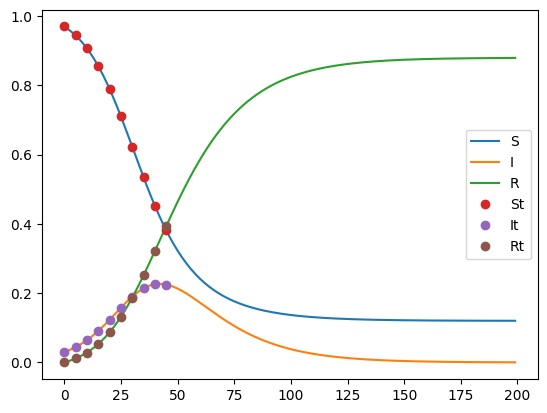

In [6]:
sim = pd.read_csv(r'C:\Users\oscar\OneDrive - Universidad Nacional de Colombia\Universidad-Fisica\Introduccion a la investigacion teorica\Dinamica viral\Simulacion\sim_SIR.csv')
N_old = sim['S'][0] + sim['I'][0] + sim['R'][0]
sim['S'] = sim['S'] / N_old
sim['I'] = sim['I'] / N_old
sim['R'] = sim['R'] / N_old

sim_t = torch.tensor(sim[['t']].values, dtype=torch.float32)
sim_data = torch.tensor(sim[['S', 'I', 'R']].values, dtype=torch.float32)

print(sim_t.shape, sim_data.shape)

sim_t_train = sim_t[:50:5]
sim_data_train = sim_data[:50:5]

print(sim_t_train.shape, sim_data_train.shape)

fig = plt.figure()
plt.plot(sim_t, sim_data, label=['S', 'I', 'R'])
plt.plot(sim_t_train, sim_data_train, 'o', label=['St', 'It', 'Rt'])
plt.legend();

## PINN con busqueda de parametros

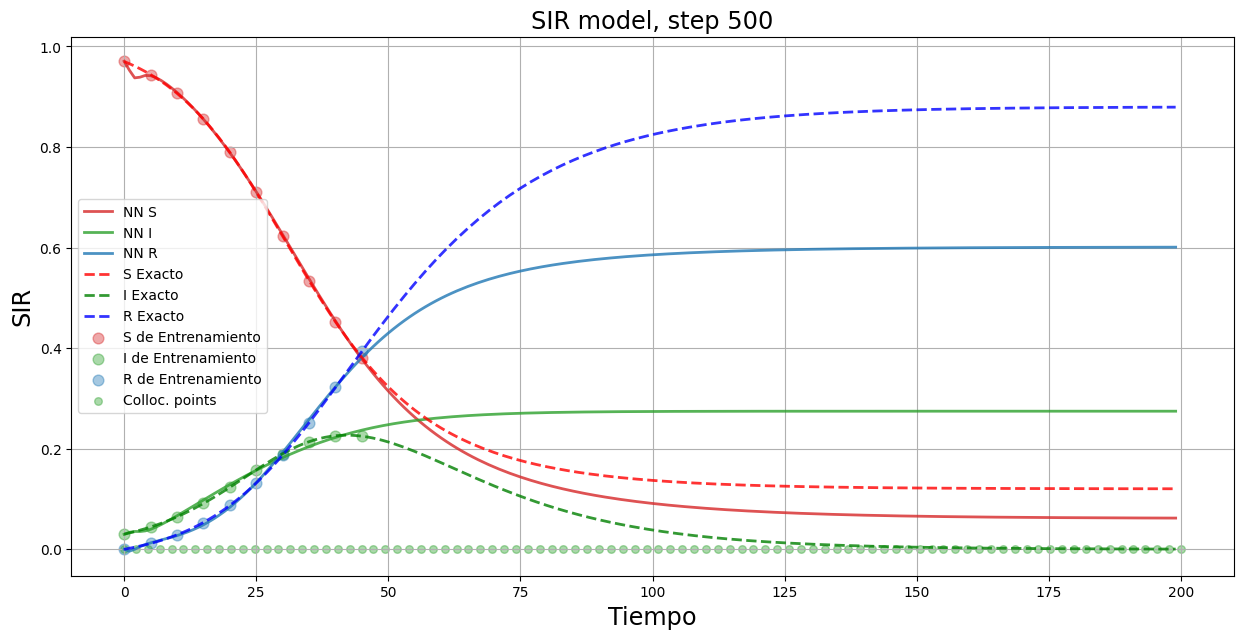

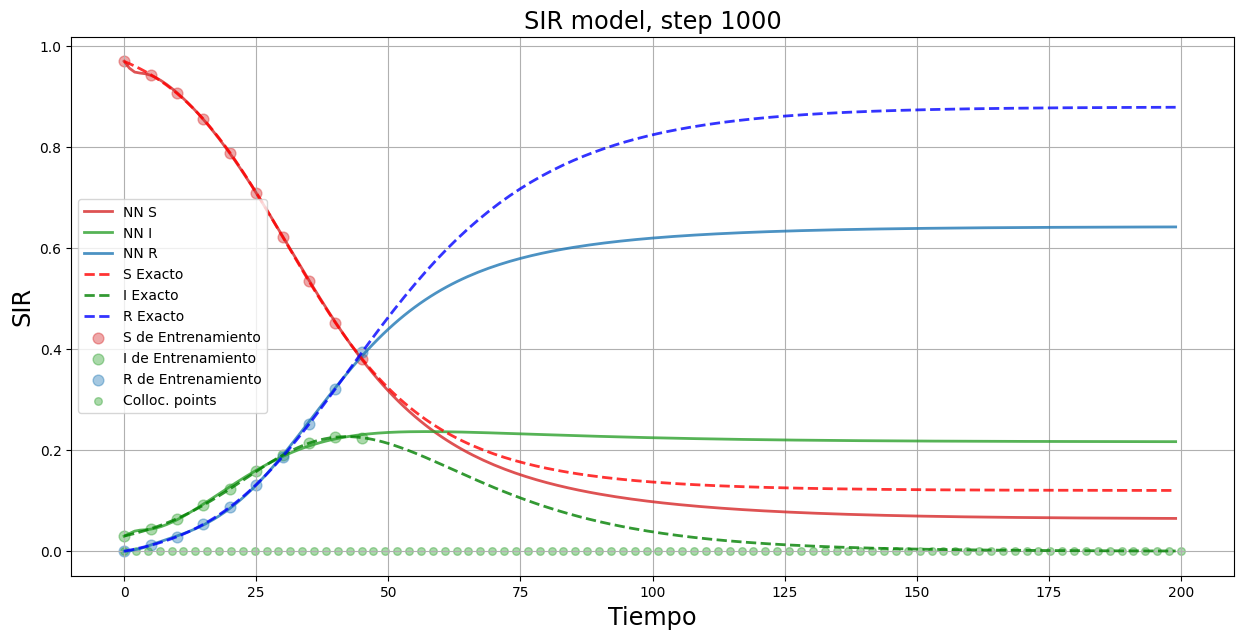

step = 1000 , loss1 = 7.8941675e-06 , loss2 = 2.9659277e-05 , loss = 3.7553444e-05 , mse = 0.019688223 , beta = 0.10787206 , gamma = 0.015021891


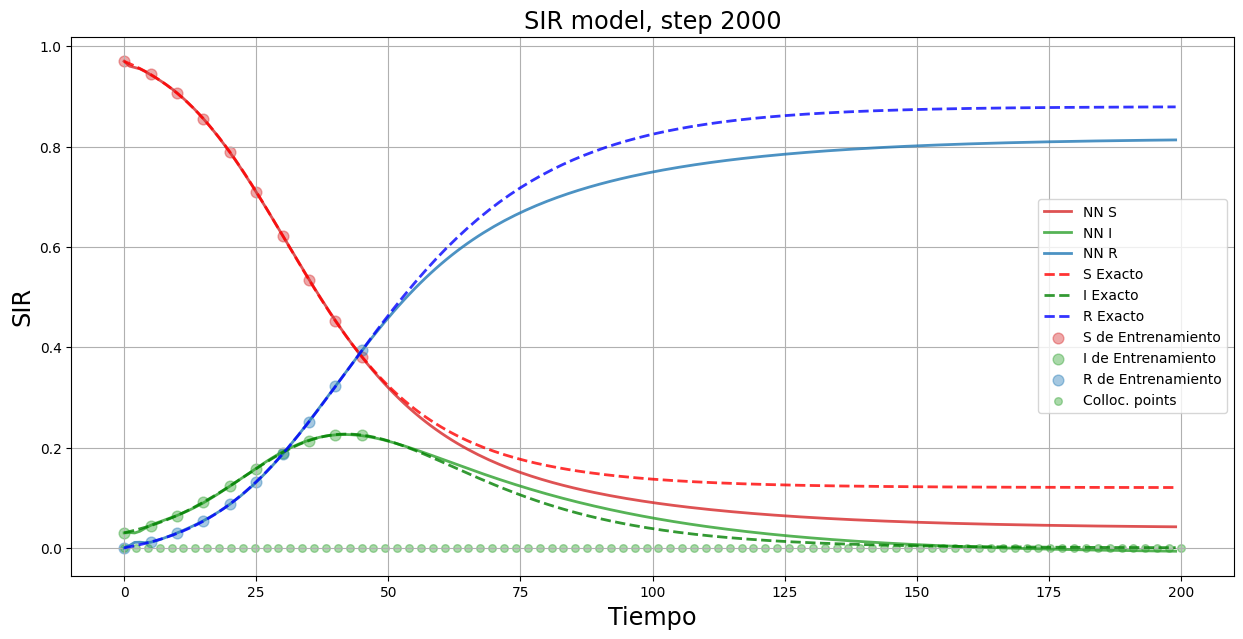

step = 2000 , loss1 = 4.8404854e-07 , loss2 = 1.9431095e-06 , loss = 2.427158e-06 , mse = 0.001973161 , beta = 0.14734775 , gamma = 0.05696943


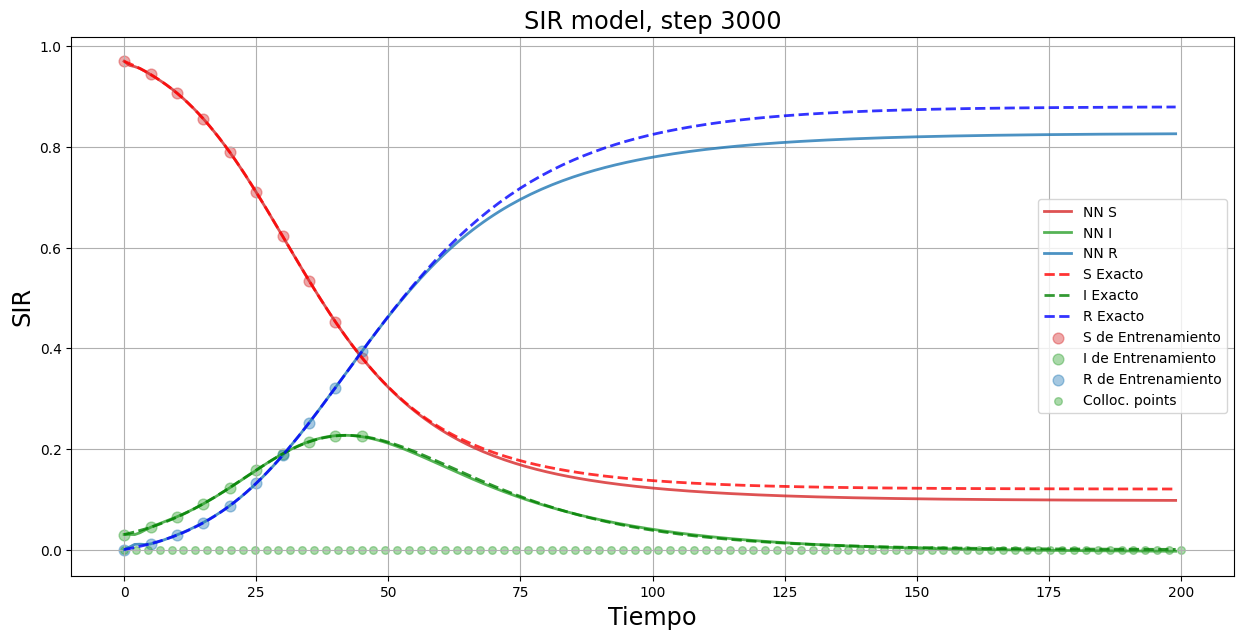

step = 3000 , loss1 = 1.07084716e-07 , loss2 = 3.8019823e-07 , loss = 4.8728293e-07 , mse = 0.00059757003 , beta = 0.15008605 , gamma = 0.062291034


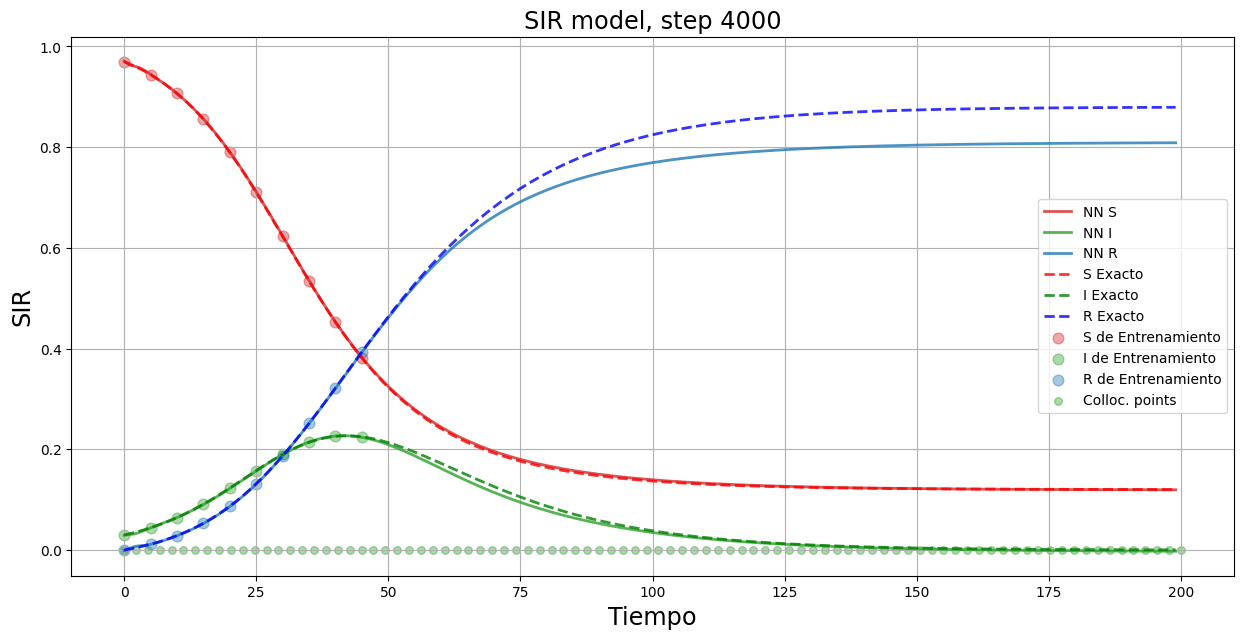

step = 4000 , loss1 = 3.4037856e-07 , loss2 = 2.7084582e-07 , loss = 6.112244e-07 , mse = 0.0008602702 , beta = 0.14973822 , gamma = 0.06347553
step = 5000 , loss1 = 5.7826252e-08 , loss2 = 1.8034603e-07 , loss = 2.3817229e-07 , mse = 0.0005533956 , beta = 0.15038763 , gamma = 0.06412793
step = 6000 , loss1 = 3.7934376e-05 , loss2 = 5.036286e-07 , loss = 3.8438004e-05 , mse = 0.0009524787 , beta = 0.14735651 , gamma = 0.063219674


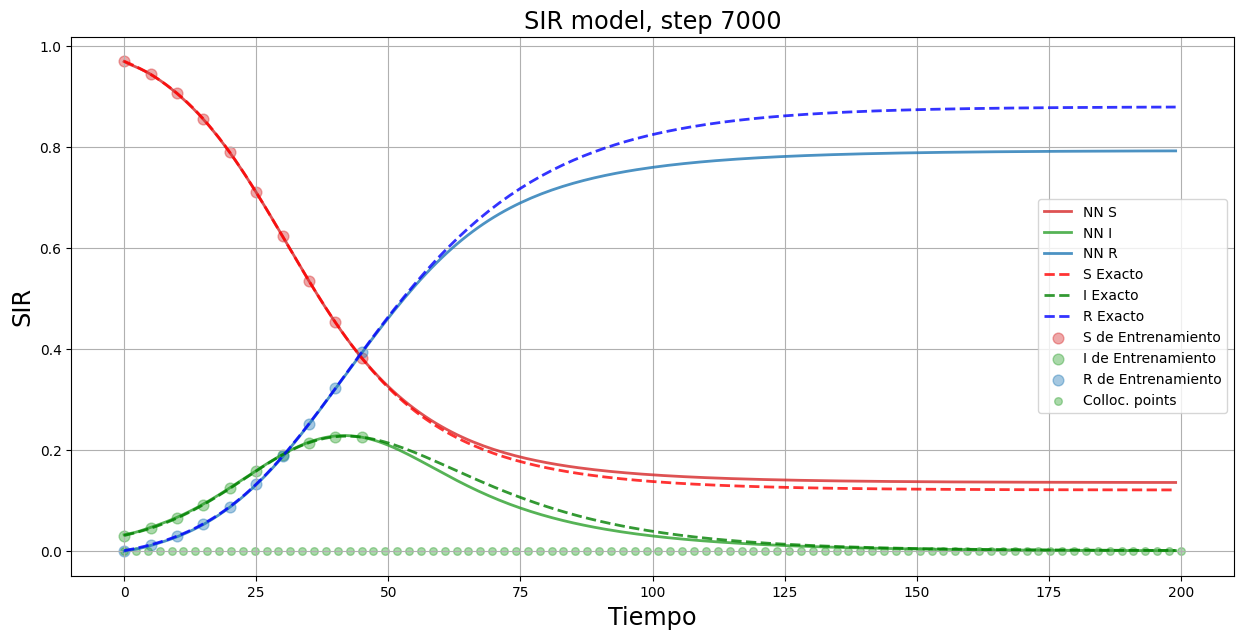

step = 7000 , loss1 = 3.4771458e-06 , loss2 = 3.079853e-07 , loss = 3.7851312e-06 , mse = 0.001313877 , beta = 0.14982197 , gamma = 0.06488559
step = 8000 , loss1 = 6.835859e-06 , loss2 = 1.5282116e-07 , loss = 6.98868e-06 , mse = 0.0005499212 , beta = 0.15013099 , gamma = 0.06403024
step = 9000 , loss1 = 2.8156226e-06 , loss2 = 1.6997024e-07 , loss = 2.9855928e-06 , mse = 0.000710894 , beta = 0.15001215 , gamma = 0.06419548
step = 10000 , loss1 = 2.4856297e-07 , loss2 = 1.3735662e-07 , loss = 3.8591958e-07 , mse = 0.0005369815 , beta = 0.15001638 , gamma = 0.06391255
step = 11000 , loss1 = 9.06133e-06 , loss2 = 1.7100922e-07 , loss = 9.23234e-06 , mse = 0.0007459111 , beta = 0.15107842 , gamma = 0.06418556
step = 12000 , loss1 = 1.0022419e-05 , loss2 = 1.2879548e-07 , loss = 1.0151214e-05 , mse = 0.0005743913 , beta = 0.1488839 , gamma = 0.06321164
step = 13000 , loss1 = 1.7082872e-08 , loss2 = 1.4860986e-07 , loss = 1.6569273e-07 , mse = 0.0006378923 , beta = 0.15011747 , gamma = 0.0

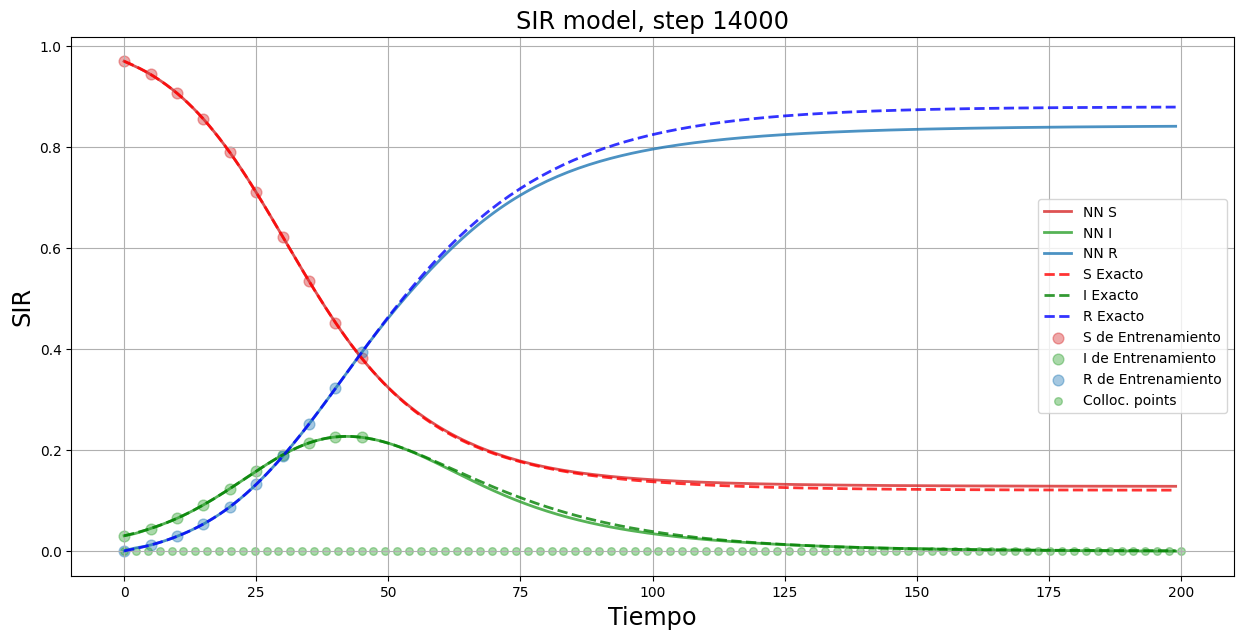

step = 14000 , loss1 = 6.1284644e-09 , loss2 = 8.1371645e-08 , loss = 8.750011e-08 , mse = 0.00026513313 , beta = 0.14997509 , gamma = 0.0633781
step = 15000 , loss1 = 8.035775e-09 , loss2 = 6.930704e-08 , loss = 7.734282e-08 , mse = 0.00020487416 , beta = 0.14995769 , gamma = 0.0633146
step = 16000 , loss1 = 2.7503873e-07 , loss2 = 9.823809e-08 , loss = 3.732768e-07 , mse = 0.000406038 , beta = 0.14986202 , gamma = 0.06347036
step = 17000 , loss1 = 7.616262e-09 , loss2 = 9.207656e-08 , loss = 9.9692826e-08 , mse = 0.0004026324 , beta = 0.1501827 , gamma = 0.06348806
step = 18000 , loss1 = 1.4782206e-08 , loss2 = 4.668332e-08 , loss = 6.146553e-08 , mse = 0.00015667499 , beta = 0.15040393 , gamma = 0.06342154
step = 19000 , loss1 = 1.2400004e-07 , loss2 = 1.5460521e-06 , loss = 1.6700521e-06 , mse = 0.005498681 , beta = 0.14886285 , gamma = 0.06090743
step = 20000 , loss1 = 6.546226e-09 , loss2 = 8.3179856e-08 , loss = 8.972608e-08 , mse = 0.00023137947 , beta = 0.15041564 , gamma = 0.

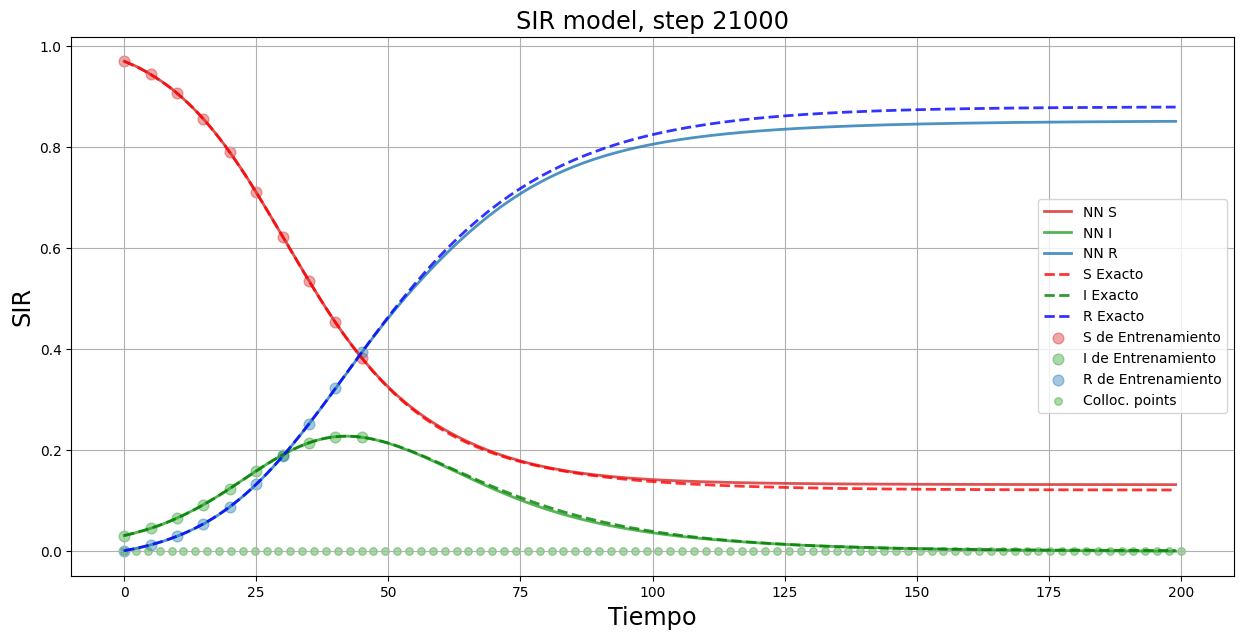

step = 21000 , loss1 = 3.1502175e-08 , loss2 = 5.7892947e-08 , loss = 8.939512e-08 , mse = 0.00014889707 , beta = 0.15010142 , gamma = 0.063429624
step = 22000 , loss1 = 6.4936865e-09 , loss2 = 3.8162344e-08 , loss = 4.465603e-08 , mse = 9.8777215e-05 , beta = 0.1505393 , gamma = 0.06346418
step = 23000 , loss1 = 1.2714739e-07 , loss2 = 6.337867e-08 , loss = 1.9052607e-07 , mse = 0.00018670663 , beta = 0.14989409 , gamma = 0.06343655
step = 24000 , loss1 = 6.679481e-06 , loss2 = 8.6016044e-08 , loss = 6.765497e-06 , mse = 0.00016065071 , beta = 0.15006678 , gamma = 0.06316429
step = 25000 , loss1 = 1.8781569e-07 , loss2 = 3.90729e-08 , loss = 2.2688859e-07 , mse = 0.00011259293 , beta = 0.1505443 , gamma = 0.06359892
step = 26000 , loss1 = 1.6966652e-06 , loss2 = 1.4326557e-07 , loss = 1.8399307e-06 , mse = 0.00044029797 , beta = 0.15009147 , gamma = 0.06322843
step = 27000 , loss1 = 1.5993935e-06 , loss2 = 3.4989146e-08 , loss = 1.6343827e-06 , mse = 6.2645326e-05 , beta = 0.15071835 

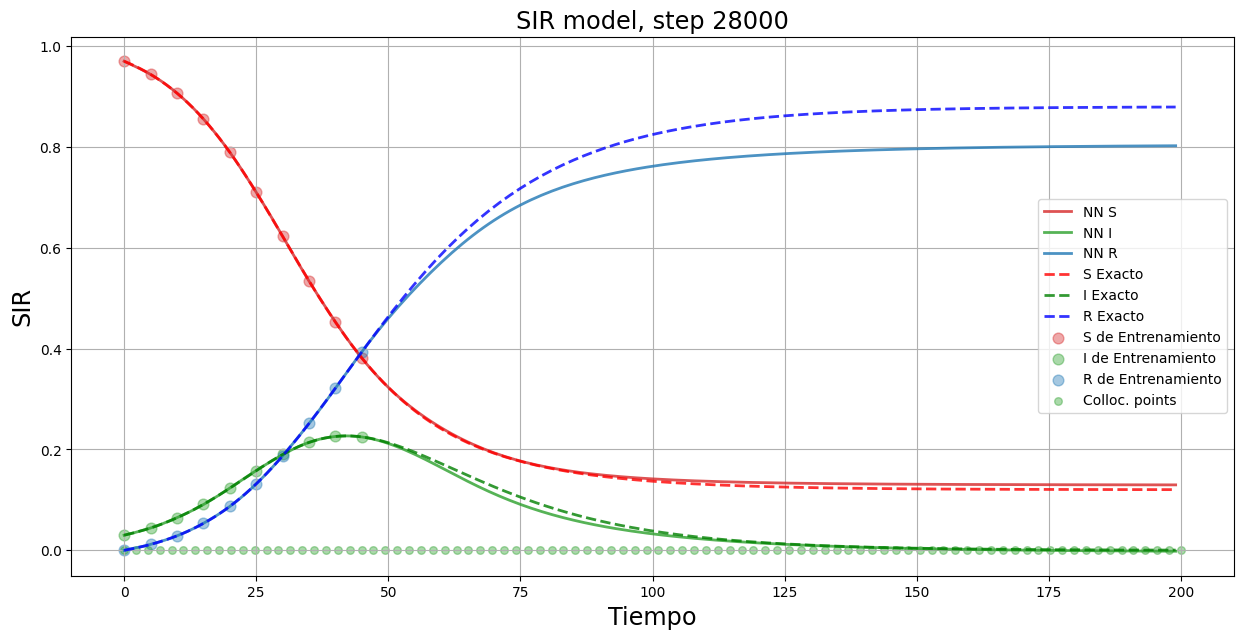

step = 28000 , loss1 = 4.4940517e-08 , loss2 = 2.493706e-07 , loss = 2.9431112e-07 , mse = 0.0010890161 , beta = 0.14935185 , gamma = 0.06306805
step = 29000 , loss1 = 1.5294668e-06 , loss2 = 1.5996358e-07 , loss = 1.6894303e-06 , mse = 0.00036759416 , beta = 0.15013085 , gamma = 0.06398922
step = 30000 , loss1 = 9.0014873e-07 , loss2 = 1.1997096e-07 , loss = 1.0201197e-06 , mse = 0.00032730462 , beta = 0.1511232 , gamma = 0.06466978
step = 31000 , loss1 = 3.719997e-08 , loss2 = 2.5685537e-08 , loss = 6.2885505e-08 , mse = 5.872631e-05 , beta = 0.15051623 , gamma = 0.06349164
step = 32000 , loss1 = 2.867474e-07 , loss2 = 3.454685e-08 , loss = 3.2129424e-07 , mse = 0.00013842533 , beta = 0.15057722 , gamma = 0.06352837
step = 33000 , loss1 = 7.4555965e-07 , loss2 = 2.7825699e-08 , loss = 7.7338535e-07 , mse = 6.523054e-05 , beta = 0.15061845 , gamma = 0.063668974
step = 34000 , loss1 = 7.0360744e-09 , loss2 = 2.0615675e-08 , loss = 2.765175e-08 , mse = 5.1803294e-05 , beta = 0.15075594 

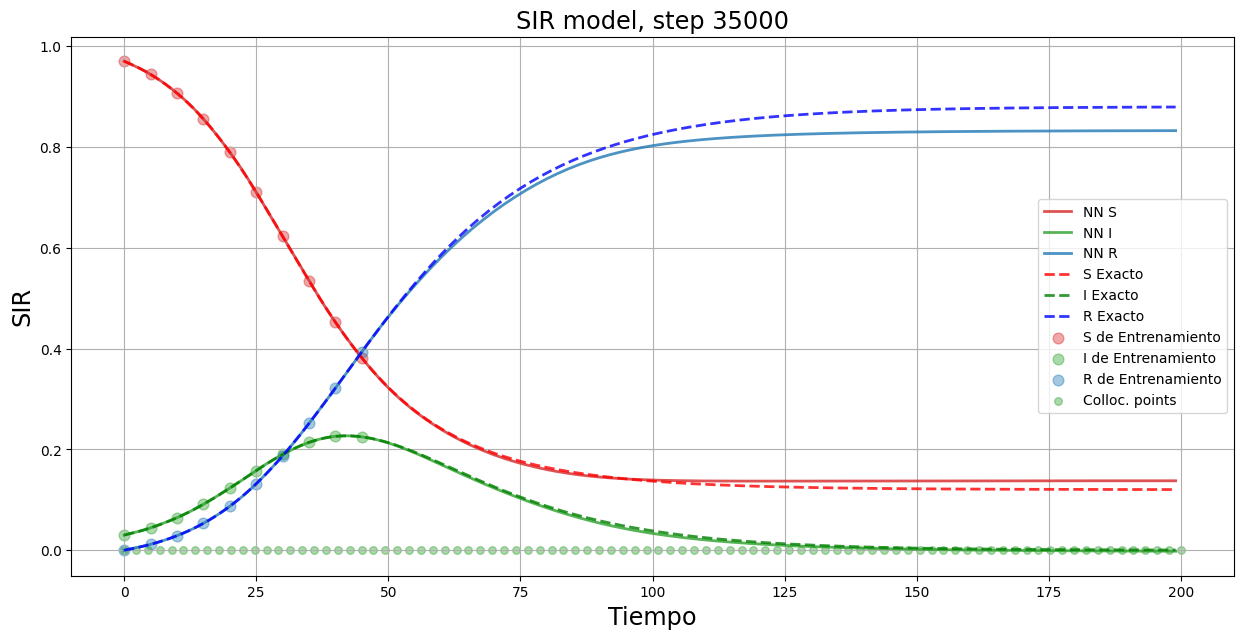

step = 35000 , loss1 = 7.0323996e-09 , loss2 = 1.0302938e-07 , loss = 1.1006178e-07 , mse = 0.0003353522 , beta = 0.1504134 , gamma = 0.06328228
step = 36000 , loss1 = 9.486689e-09 , loss2 = 3.9160234e-08 , loss = 4.8646925e-08 , mse = 0.00013767439 , beta = 0.15059264 , gamma = 0.06351748
step = 37000 , loss1 = 1.0205319e-07 , loss2 = 3.7822637e-08 , loss = 1.3987582e-07 , mse = 0.00016468616 , beta = 0.15042774 , gamma = 0.06360721
step = 38000 , loss1 = 4.365133e-09 , loss2 = 3.3230016e-08 , loss = 3.759515e-08 , mse = 9.112125e-05 , beta = 0.15055639 , gamma = 0.06370156
step = 39000 , loss1 = 2.0389674e-08 , loss2 = 3.996471e-08 , loss = 6.035438e-08 , mse = 0.00012113502 , beta = 0.15057603 , gamma = 0.06367716
step = 40000 , loss1 = 1.08055765e-05 , loss2 = 8.951063e-08 , loss = 1.0895087e-05 , mse = 9.969403e-05 , beta = 0.1499504 , gamma = 0.063273005
step = 41000 , loss1 = 1.4057533e-06 , loss2 = 9.558061e-08 , loss = 1.5013339e-06 , mse = 0.00015540372 , beta = 0.15143 , gam

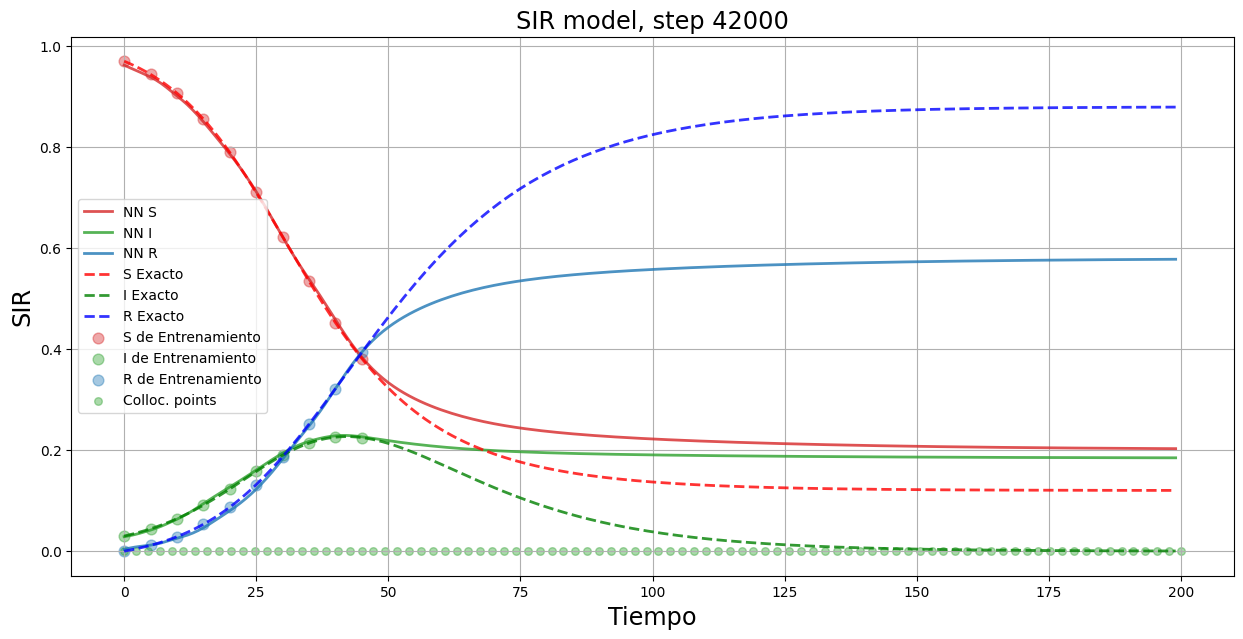

step = 42000 , loss1 = 1.1338381e-05 , loss2 = 3.770975e-05 , loss = 4.9048132e-05 , mse = 0.024993239 , beta = 0.06965274 , gamma = 0.015200213
step = 43000 , loss1 = 1.2768732e-08 , loss2 = 7.903702e-08 , loss = 9.180575e-08 , mse = 5.5702007e-05 , beta = 0.15017027 , gamma = 0.06344729
step = 44000 , loss1 = 2.793022e-07 , loss2 = 7.87758e-08 , loss = 3.58078e-07 , mse = 5.1356554e-05 , beta = 0.1502522 , gamma = 0.0635501
step = 45000 , loss1 = 3.6631007e-09 , loss2 = 6.278154e-08 , loss = 6.644464e-08 , mse = 2.6197233e-05 , beta = 0.15042314 , gamma = 0.06370154
step = 46000 , loss1 = 7.4591405e-10 , loss2 = 3.6164217e-08 , loss = 3.691013e-08 , mse = 1.2919412e-05 , beta = 0.15042871 , gamma = 0.06359404
step = 47000 , loss1 = 1.9081458e-08 , loss2 = 1.8991871e-08 , loss = 3.807333e-08 , mse = 1.62584e-05 , beta = 0.1503989 , gamma = 0.06348817
step = 48000 , loss1 = 2.2535912e-06 , loss2 = 3.085642e-08 , loss = 2.2844476e-06 , mse = 3.075389e-05 , beta = 0.15039432 , gamma = 0.

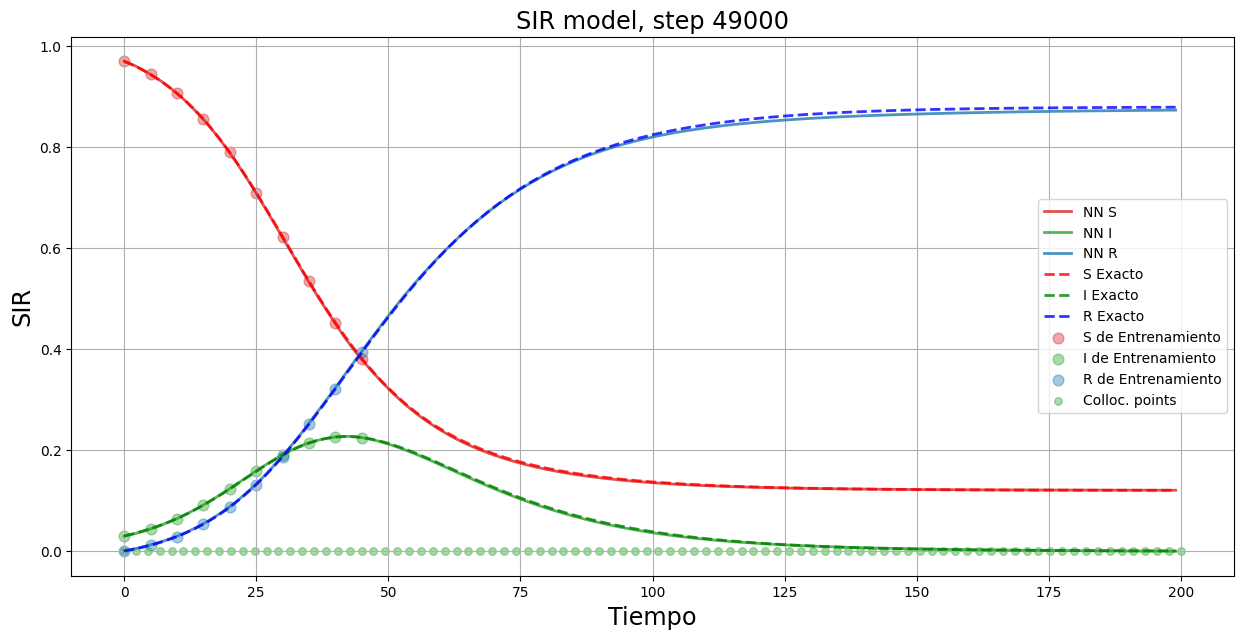

step = 49000 , loss1 = 1.1532277e-06 , loss2 = 2.1879135e-08 , loss = 1.1751068e-06 , mse = 1.0582345e-05 , beta = 0.15042336 , gamma = 0.063371055
step = 50000 , loss1 = 4.8977637e-07 , loss2 = 3.3976047e-08 , loss = 5.237524e-07 , mse = 3.6619593e-05 , beta = 0.15032306 , gamma = 0.06348452
step = 51000 , loss1 = 1.507534e-09 , loss2 = 3.0515486e-07 , loss = 3.066624e-07 , mse = 0.0005382423 , beta = 0.15008152 , gamma = 0.06381497
step = 52000 , loss1 = 1.4975783e-09 , loss2 = 1.0221159e-07 , loss = 1.0370916e-07 , mse = 3.587156e-05 , beta = 0.15021965 , gamma = 0.063492596
step = 53000 , loss1 = 6.7106787e-10 , loss2 = 3.9701916e-08 , loss = 4.0372985e-08 , mse = 9.489904e-06 , beta = 0.1505087 , gamma = 0.0635541
step = 54000 , loss1 = 1.2620306e-09 , loss2 = 3.1968106e-08 , loss = 3.3230137e-08 , mse = 1.1744265e-05 , beta = 0.15052482 , gamma = 0.063651964
step = 55000 , loss1 = 1.5232995e-08 , loss2 = 2.1318598e-08 , loss = 3.6551594e-08 , mse = 1.7104981e-05 , beta = 0.150536

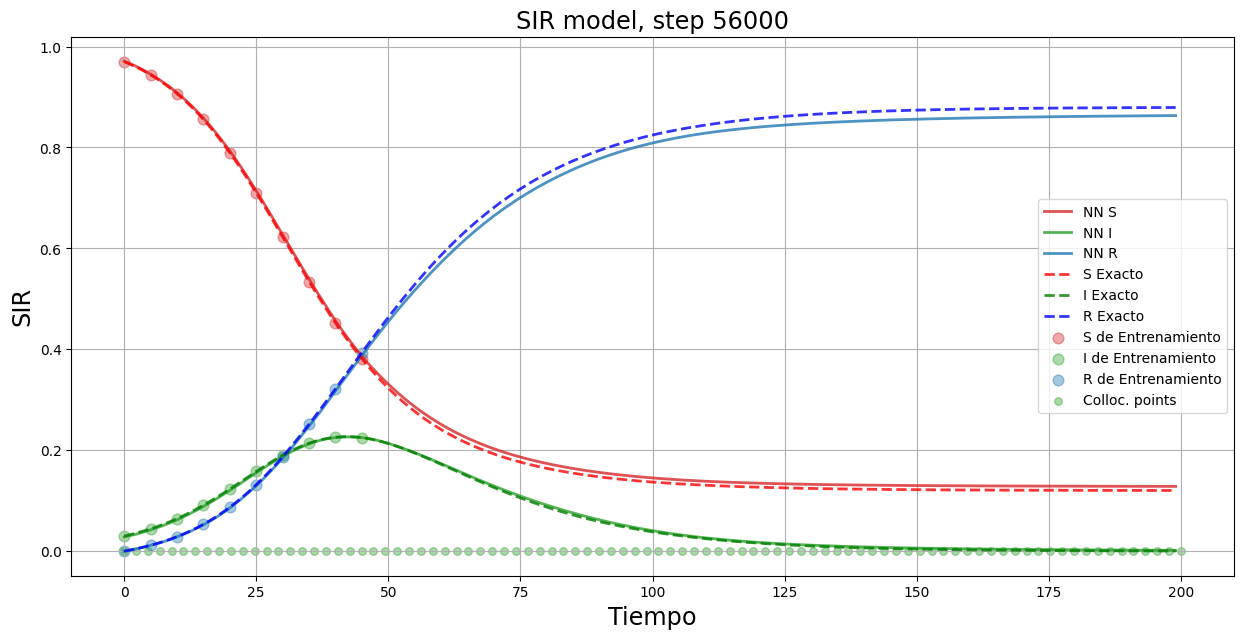

step = 56000 , loss1 = 9.331193e-06 , loss2 = 6.8723466e-08 , loss = 9.399916e-06 , mse = 9.12581e-05 , beta = 0.14954767 , gamma = 0.06341847
step = 57000 , loss1 = 1.7561152e-07 , loss2 = 2.163953e-08 , loss = 1.9725104e-07 , mse = 3.5511213e-05 , beta = 0.15046695 , gamma = 0.063612305
step = 58000 , loss1 = 6.420157e-08 , loss2 = 1.5767052e-06 , loss = 1.6409068e-06 , mse = 0.009013599 , beta = 0.1490923 , gamma = 0.06485845
step = 59000 , loss1 = 2.2796153e-08 , loss2 = 3.5083463e-07 , loss = 3.7363077e-07 , mse = 0.0022012135 , beta = 0.15016995 , gamma = 0.06428792
step = 60000 , loss1 = 9.4718786e-08 , loss2 = 1.9241168e-07 , loss = 2.8713046e-07 , mse = 0.0011864518 , beta = 0.1505086 , gamma = 0.06405391
step = 61000 , loss1 = 1.332226e-07 , loss2 = 4.458974e-08 , loss = 1.7781234e-07 , mse = 0.00016947745 , beta = 0.15060306 , gamma = 0.063569844
step = 62000 , loss1 = 8.007836e-07 , loss2 = 1.1078194e-07 , loss = 9.115655e-07 , mse = 0.00047865172 , beta = 0.15083623 , gamm

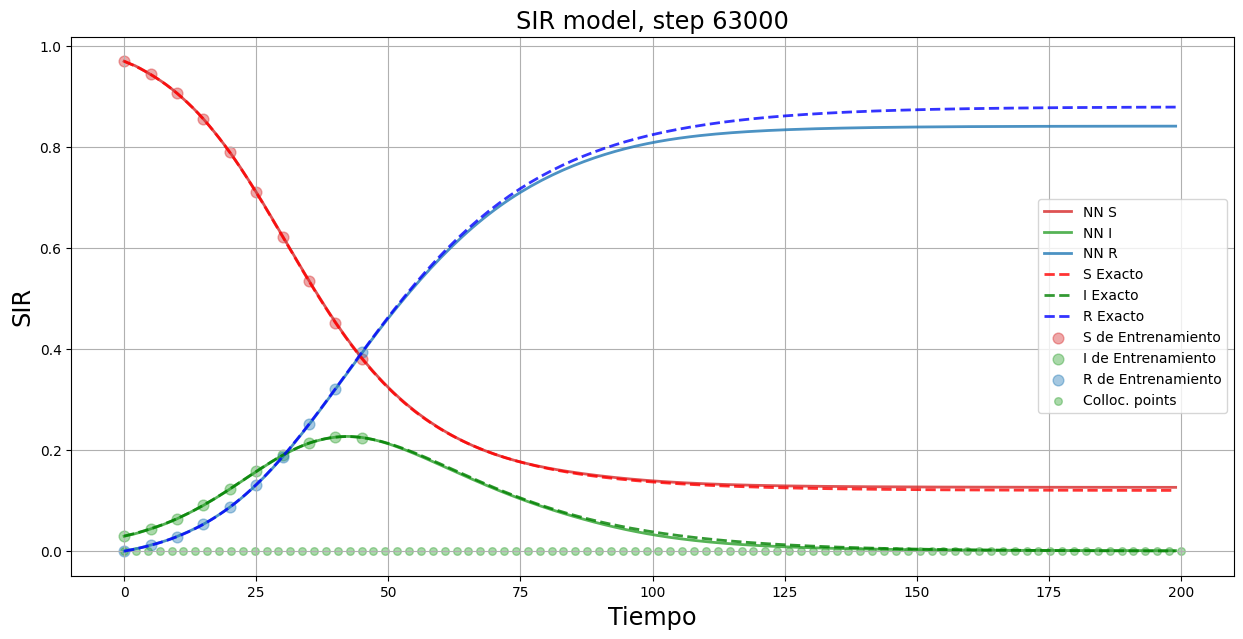

step = 63000 , loss1 = 3.211981e-07 , loss2 = 4.0148535e-08 , loss = 3.6134662e-07 , mse = 0.00018445944 , beta = 0.15064128 , gamma = 0.06369259
step = 64000 , loss1 = 5.6114536e-06 , loss2 = 8.463765e-08 , loss = 5.696091e-06 , mse = 0.0003090006 , beta = 0.14913964 , gamma = 0.06309736
step = 65000 , loss1 = 1.1208573e-05 , loss2 = 1.0923947e-07 , loss = 1.1317812e-05 , mse = 0.00023439298 , beta = 0.14905484 , gamma = 0.06310604
step = 66000 , loss1 = 8.3472005e-06 , loss2 = 1.7083042e-07 , loss = 8.518031e-06 , mse = 0.00017398776 , beta = 0.15185171 , gamma = 0.06377846
step = 67000 , loss1 = 1.2564831e-09 , loss2 = 4.784637e-08 , loss = 4.9102855e-08 , mse = 0.00012346137 , beta = 0.15059684 , gamma = 0.06361008
step = 68000 , loss1 = 1.6141993e-10 , loss2 = 2.7603104e-08 , loss = 2.7764523e-08 , mse = 6.183367e-05 , beta = 0.15059787 , gamma = 0.06358731
step = 69000 , loss1 = 2.13933e-06 , loss2 = 4.9464955e-08 , loss = 2.188795e-06 , mse = 0.00011109038 , beta = 0.14989974 , 

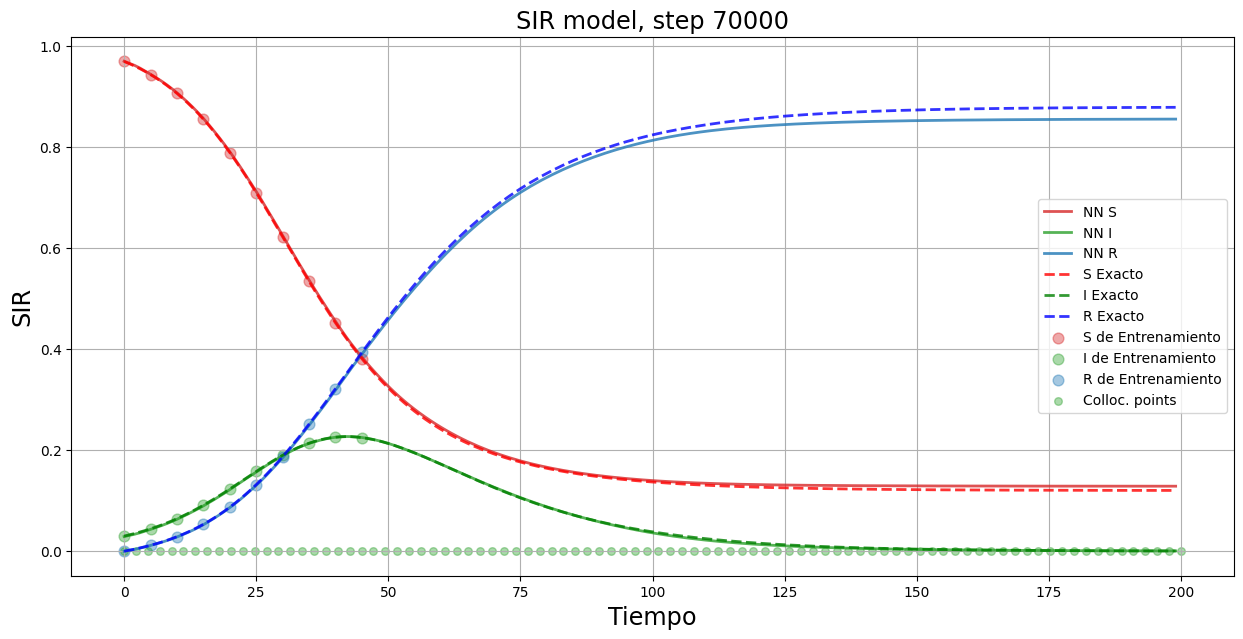

step = 70000 , loss1 = 2.8503985e-06 , loss2 = 3.345079e-08 , loss = 2.8838492e-06 , mse = 8.1223174e-05 , beta = 0.1509924 , gamma = 0.06377457


In [12]:

# Define device
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Your data tensors
x_data = sim_t_train.to(DEVICE)
y_data = sim_data_train.to(DEVICE)
x = sim_t.to(DEVICE)
y = sim_data.to(DEVICE)

# ......................
N = 1.0
torch.manual_seed(123)

# Move model to the device
modelD = FCND(1, 3, 42, 4).to(DEVICE)

optimizer = torch.optim.Adam(modelD.parameters(), lr=3e-3)

steps = 70000
print_steps = 500
n_prints = steps // print_steps

sim_loss1_history = np.zeros(n_prints)
sim_loss2_history = np.zeros(n_prints)
sim_loss_history = np.zeros(n_prints)
sim_mse_history = np.zeros(n_prints)
sim_beta_history = np.zeros(n_prints)
sim_gamma_history = np.zeros(n_prints)

x_physics = torch.linspace(0., 200, 90).view(-1, 1).requires_grad_(True).to(DEVICE)

for i in range(steps):
    optimizer.zero_grad()
    
    # compute the "data loss"
    yh = modelD(x_data)
    loss1 = 1 * torch.mean((yh - y_data)**2)
    
    # compute the "physics loss" with enforcing the initial data
    yhp = modelD(x_physics)
    yhp1 = yhp[:, 0].view(-1, 1)
    yhp2 = yhp[:, 1].view(-1, 1) 
    yhp3 = yhp[:, 2].view(-1, 1)
    
    # compute first and second derivatives by automatic differentiation
    dx1 = torch.autograd.grad(yhp1, x_physics, torch.ones_like(yhp1), create_graph=True)[0]
    dx2 = torch.autograd.grad(yhp2, x_physics, torch.ones_like(yhp2), create_graph=True)[0]
    dx3 = torch.autograd.grad(yhp3, x_physics, torch.ones_like(yhp3), create_graph=True)[0]

    # computes the residual
    physics2 = (dx1 + (modelD.beta/N) * yhp1 * yhp2)                
    physics1 = (dx2 - (modelD.beta/N) * yhp1 * yhp2 + modelD.gamma * yhp2)
    physics3 = (dx3 - modelD.gamma * yhp2)
    loss2 = 1 * torch.mean((physics1)**2) + 1 * torch.mean((physics2)**2) + 1 * torch.mean((physics3)**2)
    
    # backpropagate the total loss
    loss = loss1 + loss2
    loss.backward()
    optimizer.step()    
    
    # plot the result as training progresses
    if (i + 1) % print_steps == 0: 
        i_print = i // print_steps
        sim_loss1_history[i_print] = loss1.detach().cpu().numpy()
        sim_loss2_history[i_print] = loss2.detach().cpu().numpy()
        sim_loss_history[i_print] = loss.detach().cpu().numpy()
        
        yh = modelD(x).detach()
        xp = x_physics.detach()
        
        yhpp = modelD(x)
        mse = torch.mean((yhpp - y)**2)   # compute mean square error using exact solution
        sim_mse_history[i_print] = mse.detach().cpu().numpy()

        sim_beta_history[i_print] = modelD.beta.detach().cpu().numpy()[0]
        sim_gamma_history[i_print] = modelD.gamma.detach().cpu().numpy()[0]

        if (i + 1) == 500: plot_result(i, x.cpu(), y.cpu(), x_data.cpu(), y_data.cpu(), yh.cpu(), xp.cpu())
        if (i + 1) % 1000 == 0 and (i + 1) < 5000: plot_result(i, x.cpu(), y.cpu(), x_data.cpu(), y_data.cpu(), yh.cpu(), xp.cpu())
        if (i + 1) % 7000 == 0: plot_result(i, x.cpu(), y.cpu(), x_data.cpu(), y_data.cpu(), yh.cpu(), xp.cpu())
        else: plt.close("all")
    if (i + 1) % 1000 == 0:
        print('step =', i + 1, ', loss1 =', loss1.detach().cpu().numpy(), ', loss2 =', loss2.detach().cpu().numpy(), ', loss =', loss.detach().cpu().numpy(),
              ', mse =', mse.detach().cpu().numpy(), ', beta =', modelD.beta.detach().cpu().numpy()[0], ', gamma =', modelD.gamma.detach().cpu().numpy()[0])


Los mejores valores de beta y gamma son, beta = 0.1503743678331375 , gamma = 0.06358496099710464


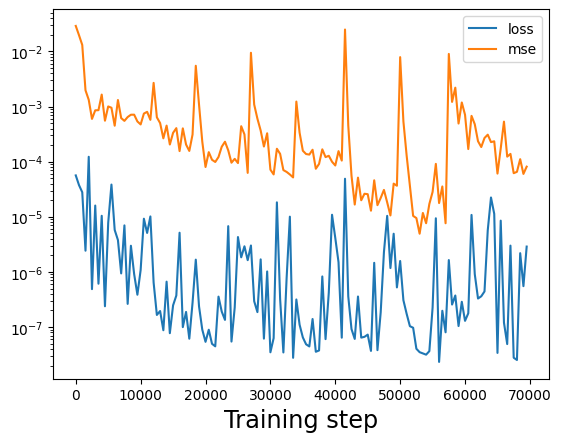

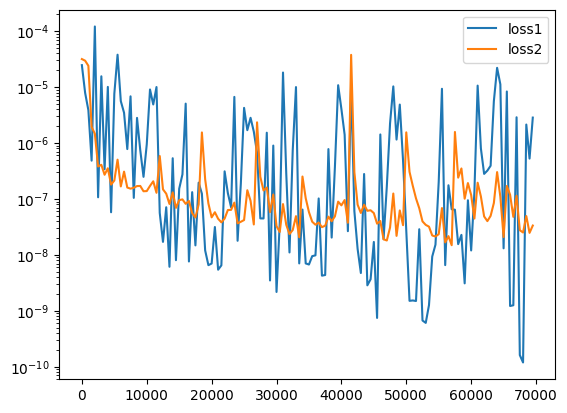

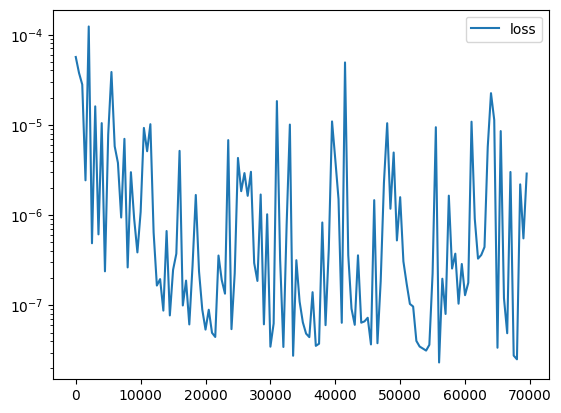

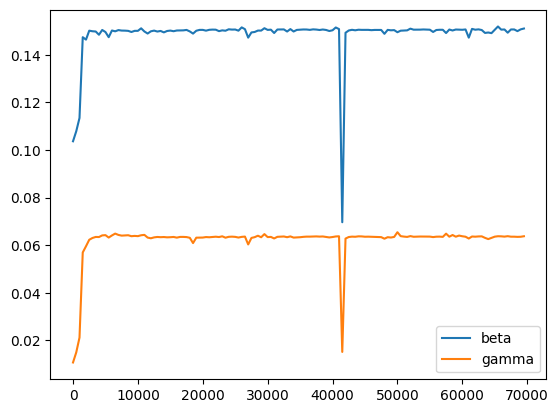

In [13]:
all_steps = np.arange(0, steps, print_steps)

fig33 = plt.figure(33)
plt.plot(all_steps,sim_loss_history, label="loss")
plt.plot(all_steps,sim_mse_history, label="mse")
plt.xlabel('Training step',fontsize="xx-large")
plt.yscale('log')
plt.legend()

fig50 = plt.figure(50)
plt.plot(all_steps,sim_loss1_history, label="loss1")
plt.plot(all_steps,sim_loss2_history, label="loss2")
plt.yscale('log')
plt.legend()

fig51 = plt.figure(51)
plt.plot(all_steps,sim_loss_history, label="loss")
plt.yscale('log')
plt.legend()

fig60 = plt.figure(60)
plt.plot(all_steps,sim_beta_history, label="beta")
plt.plot(all_steps,sim_gamma_history, label="gamma")
plt.legend()

#find the index of min loss
min_loss_index = np.argmin(sim_loss_history)
print('Los mejores valores de beta y gamma son, beta =', sim_beta_history[min_loss_index], ', gamma =', sim_gamma_history[min_loss_index])

### PINN sin busqueda de parametros

In [ ]:
# ......................
ww=1.0
N = 1.0
beta = sim_beta_history[min_loss_index]
gamma = sim_gamma_history[min_loss_index]
torch.manual_seed(123)
model = FCN(1,3,42,4)

optimizer = torch.optim.Adam(model.parameters(),lr=3e-3)
files = []
loss1_history = []
loss2_history = []
loss_history = []
mse_history = []

x_physics = torch.linspace(0.,200,90).view(-1,1).requires_grad_(True)

for i in range(50000):
    #lim= np.minimum(200*i/74000.,200)
    #x_physics = torch.linspace(0.,lim,90).view(-1,1).requires_grad_(True)#
    optimizer.zero_grad()
    
    # compute the "data loss" ..................................................
    yh = model(x_data)
    loss1 = 1*torch.mean((yh-y_data)**2)
    
    # compute the "physics loss" with enforcing the initial data ..............
    yhp = model(x_physics)
    yhp1= yhp[:,0].view(-1,1)
    yhp2= yhp[:,1].view(-1,1) 
    yhp3= yhp[:,2].view(-1,1)
    
    # compute first and second derivatives by automatic differentiation ....................
    dx1 = torch.autograd.grad(yhp1, x_physics, torch.ones_like(yhp1), create_graph=True)[0]
    dx2 = torch.autograd.grad(yhp2, x_physics, torch.ones_like(yhp2), create_graph=True)[0]
    dx3 = torch.autograd.grad(yhp3, x_physics, torch.ones_like(yhp3), create_graph=True)[0]
    #! aqui quede
    # computes the residual .............................................
    physics2 = (dx1 + beta/N*yhp1*yhp2)                
    physics1 = (dx2 - beta/N*yhp1*yhp2 + gamma*yhp2)
    physics3 = (dx3 - gamma*yhp2)
    loss2 = 1*torch.mean((physics1)**2) + 1*torch.mean((physics2)**2) + 1*torch.mean((physics3)**2)
    
    # backpropagate the total loss ...............................................
    loss = loss1 + loss2  # add two loss terms together .....................
    loss.backward()
    optimizer.step()    
        
    # plot the result as training progresses ...............................
    
    if (i+1) % 500 == 0: 
        loss1_history.append(loss1.detach())
        loss2_history.append(loss2.detach())
        loss_history.append(loss.detach())
        
        yh = model(x).detach()
        xp = x_physics.detach()
        
        yhpp=model(x)
        mse=torch.mean((yhpp-y)**2)   # compute mean square error using exact solution .....
        mse_history.append(mse.detach())

        #if (i+1) == 500: plot_result(i,x,y,x_data,y_data,yh,xp)
        #if (i+1) % 1000 == 0 and (i+1) < 5000: plot_result(i,x,y,x_data,y_data,yh,xp)
        if (i+1) % 5000 == 0: plot_result(i,x,y,x_data,y_data,yh,xp)
        else: plt.close("all")
    if (i+1) % 1000 == 0: print(i+1, loss1.detach(), loss2.detach(), loss.detach(), mse)
    

In [ ]:
fig33 = plt.figure(33)
plt.plot(loss_history, label="loss")
plt.plot(mse_history, label="mse")
plt.xlabel('Training step ($10^2$)',fontsize="xx-large")
plt.yscale('log')
plt.legend()

fig50 = plt.figure(50)
plt.plot(loss1_history, label="loss1")
plt.plot(loss2_history, label="loss2")
plt.yscale('log')
plt.legend()

fig51 = plt.figure(51)
plt.plot(loss_history, label="loss")
plt.yscale('log')
plt.legend()

# Colombia

### Normalizado:

torch.Size([271, 1]) torch.Size([271, 3])
torch.Size([88, 1]) torch.Size([88, 3])


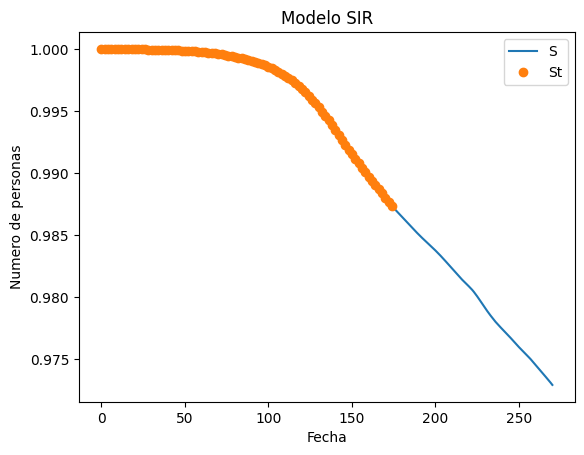

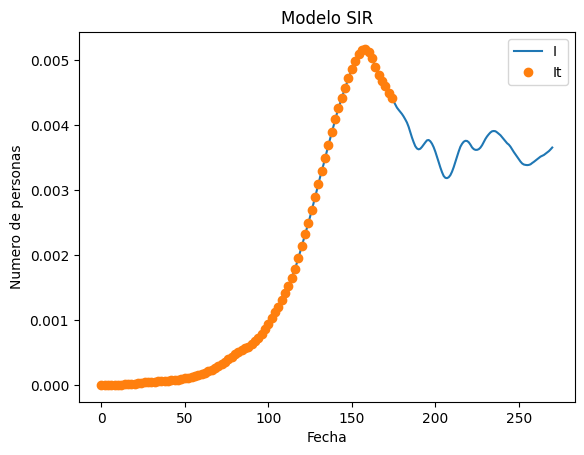

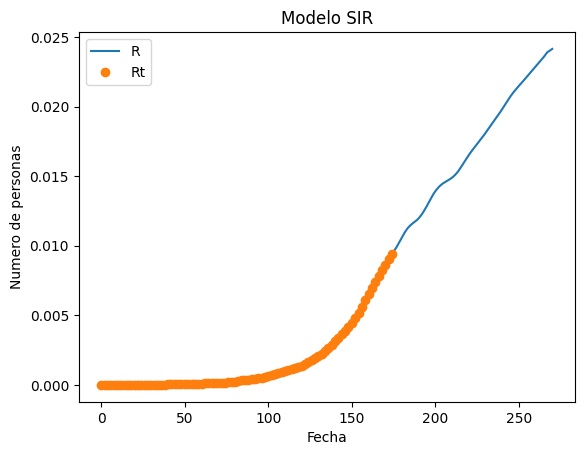

"\nfig = plt.figure()\nplt.plot(colom_t, colom_data[:,0], label='S' )\nplt.plot(colom_t_train, colom_data_train[:,0], 'o', label='St')\nplt.xlabel('Fecha')\nplt.ylabel('Numero de personas')\nplt.title('Modelo SIR')\n\n\nplt.legend();\nfig = plt.figure()\nplt.plot(colom_t, colom_data[:,1], label='I' )\nplt.plot(colom_t_train, colom_data_train[:,1], 'o', label='It')\nplt.legend();\n\nfig = plt.figure()\nplt.plot(colom_t, colom_data[:,2], label='R' )\nplt.plot(colom_t_train, colom_data_train[:,2], 'o', label='Rt')\nplt.legend();\n"

In [6]:
colom = pd.read_csv(r'C:\Users\oscar\Documents\Dinamica-Viral\colombia_data.csv')
N_old = colom['S'][0] + colom['I'][0] + colom['R'][0]
colom['S'] = colom['S'] / N_old
colom['I'] = colom['I'] / N_old
colom['R'] = colom['R'] / N_old

colom_t = torch.tensor(colom[['t']].values, dtype=torch.float32)
colom_data = torch.tensor(colom[['S', 'I', 'R']].values, dtype=torch.float32)

print(colom_t.shape, colom_data.shape)

colom_t_train = colom_t[:175:2]
colom_data_train = colom_data[:175:2]

print(colom_t_train.shape, colom_data_train.shape)


#ploting 
fig, ax = plt.subplots()
ax.plot(colom_t, colom_data[:,0], label='S')
ax.plot(colom_t_train, colom_data_train[:,0], 'o', label='St')
ax.set_xlabel('Fecha')
ax.set_ylabel('Numero de personas')
ax.set_title('Modelo SIR')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(colom_t, colom_data[:,1], label='I')
ax.plot(colom_t_train, colom_data_train[:,1], 'o', label='It')
ax.set_xlabel('Fecha')
ax.set_ylabel('Numero de personas')
ax.set_title('Modelo SIR')
ax.legend()
plt.show()


fig, ax = plt.subplots()
ax.plot(colom_t, colom_data[:,2], label='R')
ax.plot(colom_t_train, colom_data_train[:,2], 'o', label='Rt')
ax.set_xlabel('Fecha')
ax.set_ylabel('Numero de personas')
ax.set_title('Modelo SIR')
ax.legend()
plt.show()

#####################################################
'''
fig = plt.figure()
plt.plot(colom_t, colom_data[:,0], label='S' )
plt.plot(colom_t_train, colom_data_train[:,0], 'o', label='St')
plt.xlabel('Fecha')
plt.ylabel('Numero de personas')
plt.title('Modelo SIR')


plt.legend();
fig = plt.figure()
plt.plot(colom_t, colom_data[:,1], label='I' )
plt.plot(colom_t_train, colom_data_train[:,1], 'o', label='It')
plt.legend();

fig = plt.figure()
plt.plot(colom_t, colom_data[:,2], label='R' )
plt.plot(colom_t_train, colom_data_train[:,2], 'o', label='Rt')
plt.legend();
'''

### Entrenamiento

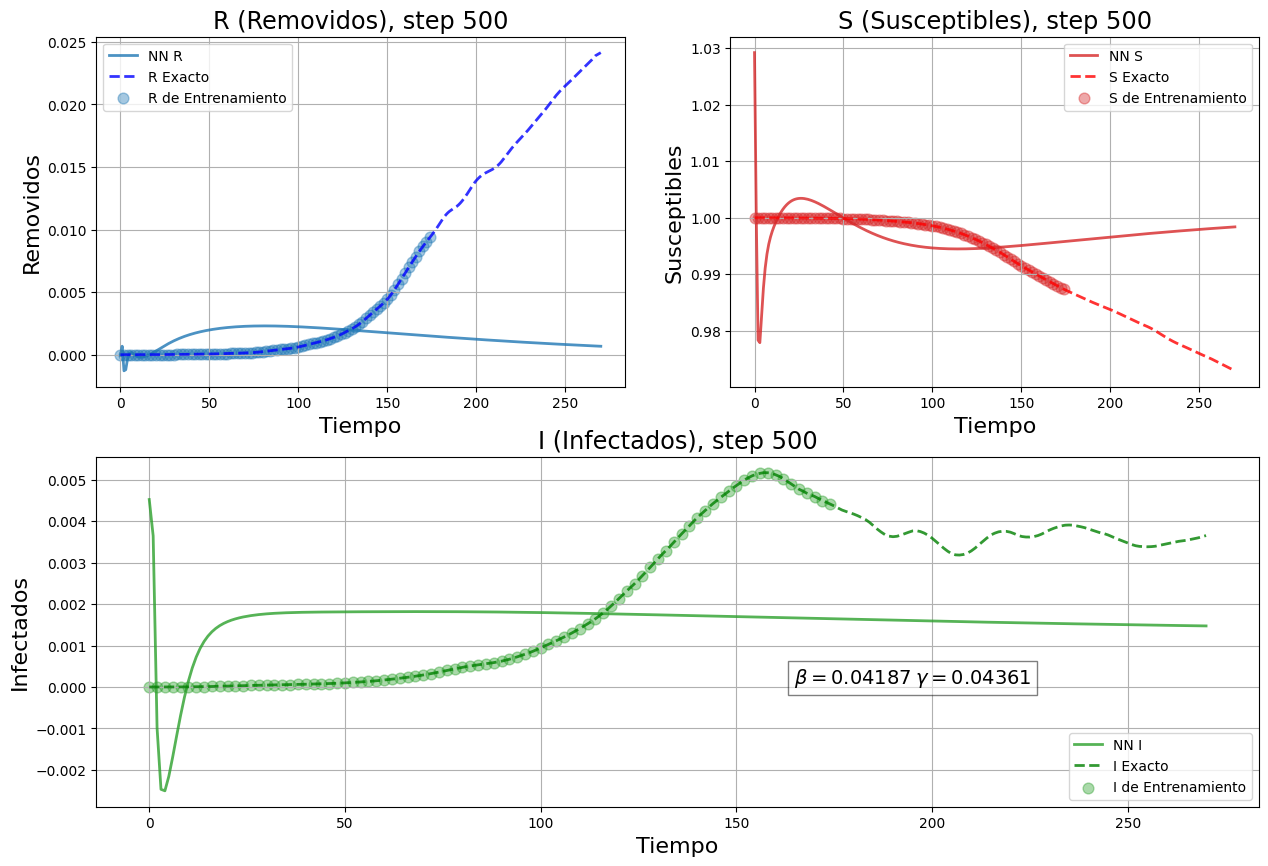

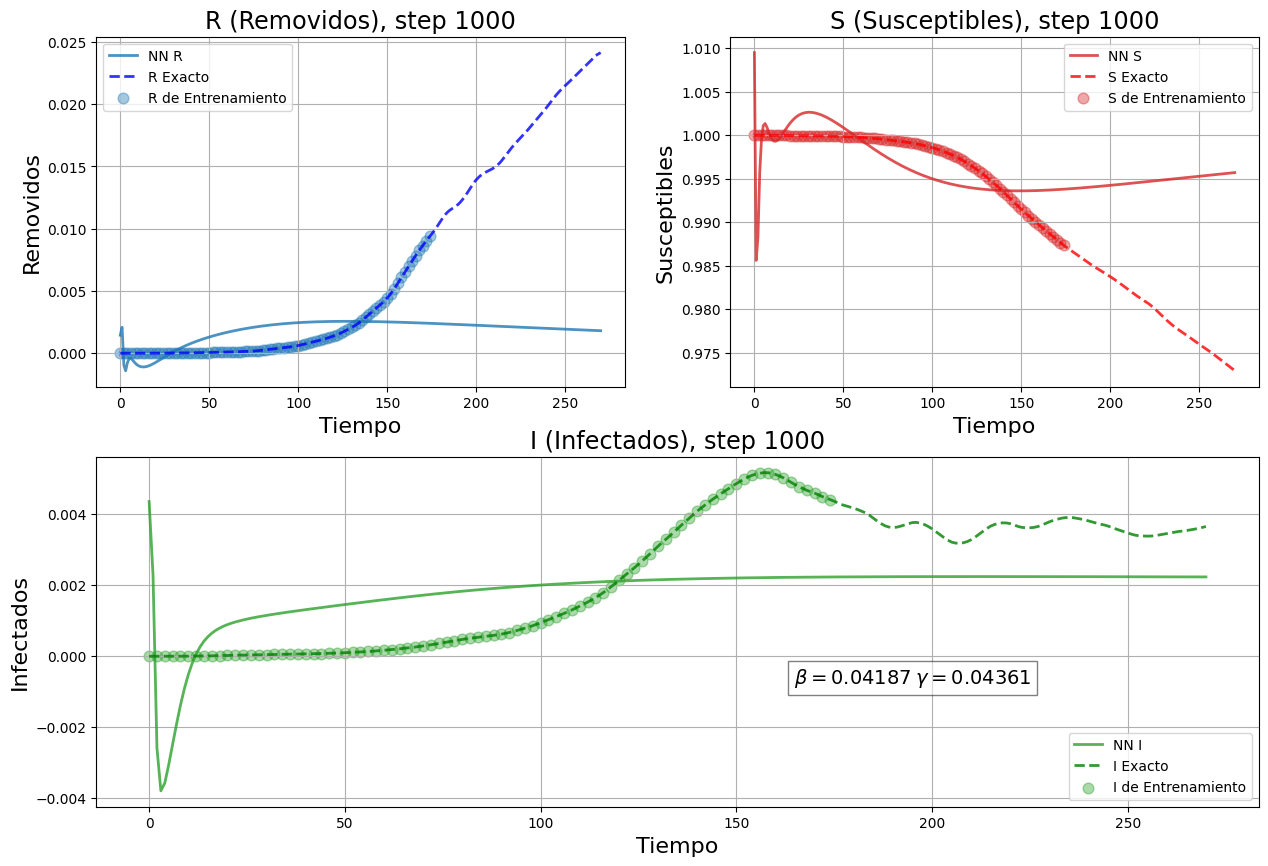

step = 1000 , loss1 = 5.766208e-06 , loss2 = 6.915872e-07 , loss = 6.457795e-06 , mse = 6.024104e-05 , beta = -0.016944626 , gamma = -0.016935775


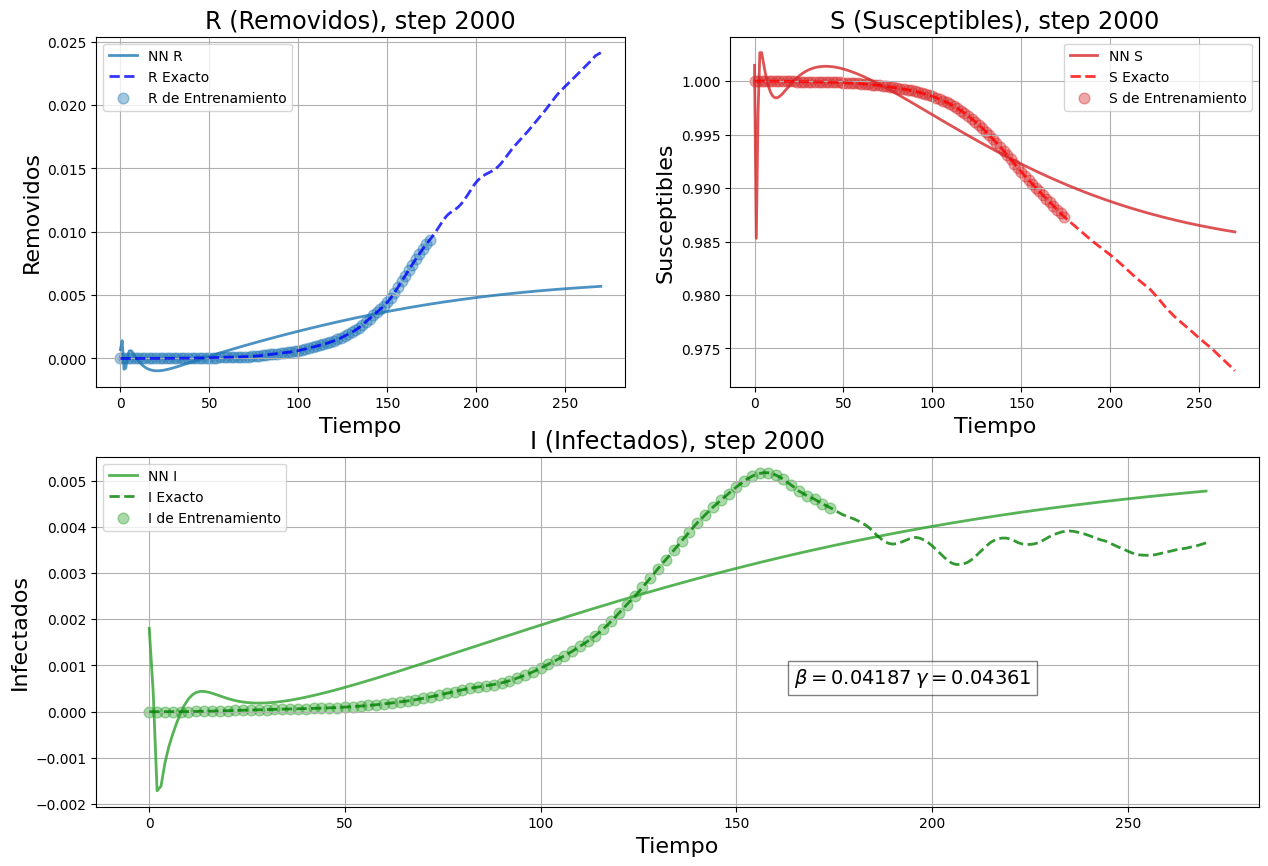

step = 2000 , loss1 = 1.759288e-06 , loss2 = 7.4757e-08 , loss = 1.834045e-06 , mse = 2.7861872e-05 , beta = -0.010714034 , gamma = -0.011101574


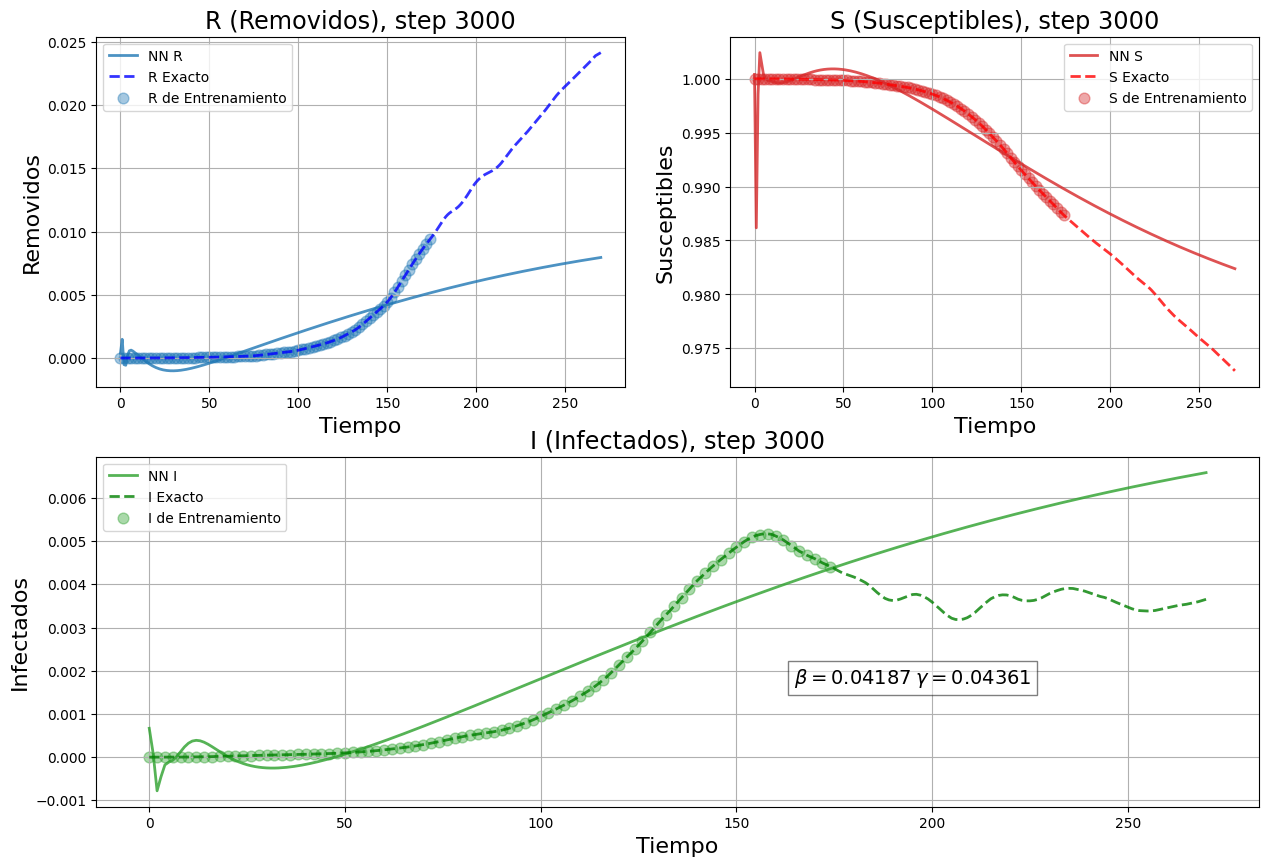

step = 3000 , loss1 = 1.1116233e-06 , loss2 = 1.9109375e-08 , loss = 1.1307327e-06 , mse = 1.9768271e-05 , beta = 0.0024543614 , gamma = 0.0001272569


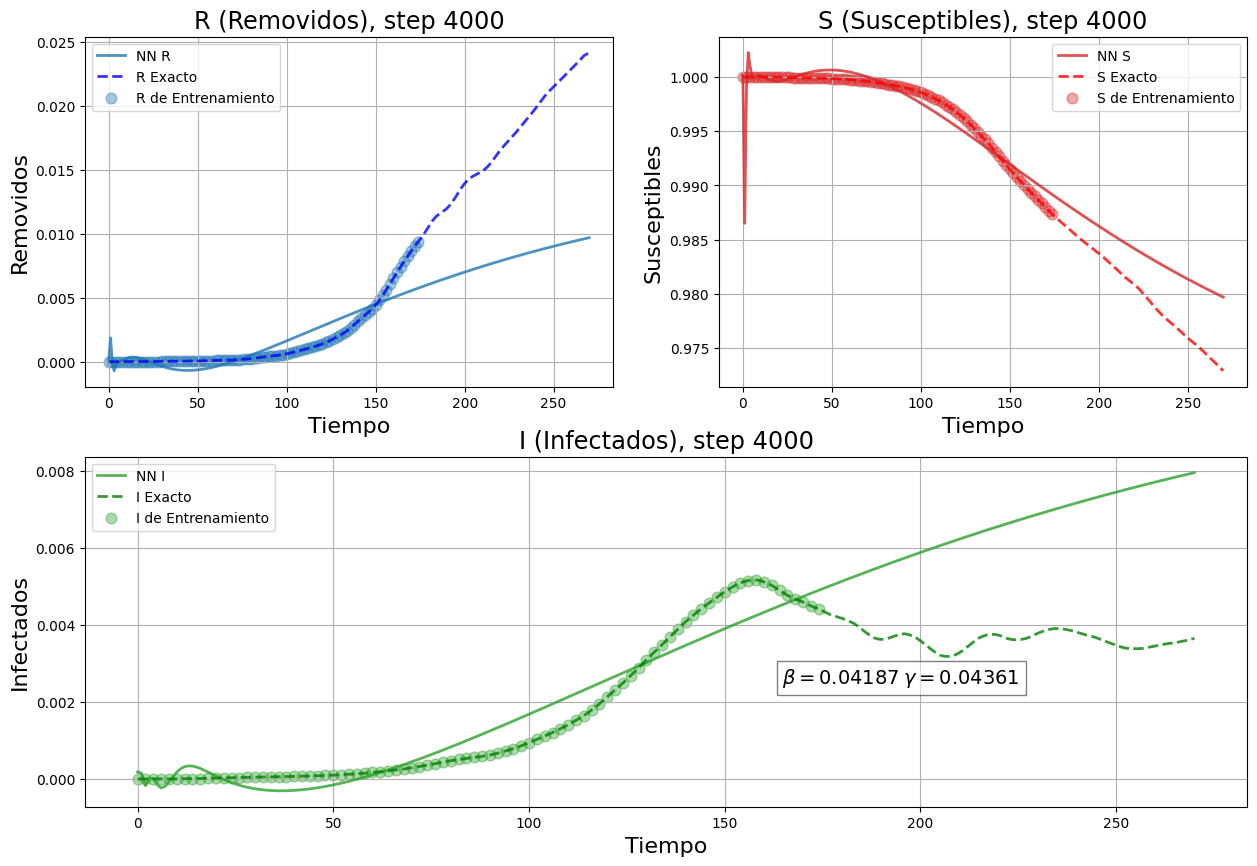

step = 4000 , loss1 = 7.0542455e-07 , loss2 = 9.492719e-09 , loss = 7.149173e-07 , mse = 1.493796e-05 , beta = 0.014017077 , gamma = 0.007447333
step = 5000 , loss1 = 4.4463152e-07 , loss2 = 1.010777e-08 , loss = 4.547393e-07 , mse = 1.1053832e-05 , beta = 0.017387064 , gamma = 0.009878649
step = 6000 , loss1 = 3.4626066e-07 , loss2 = 9.366477e-09 , loss = 3.5562715e-07 , mse = 8.91815e-06 , beta = 0.018141096 , gamma = 0.010662505


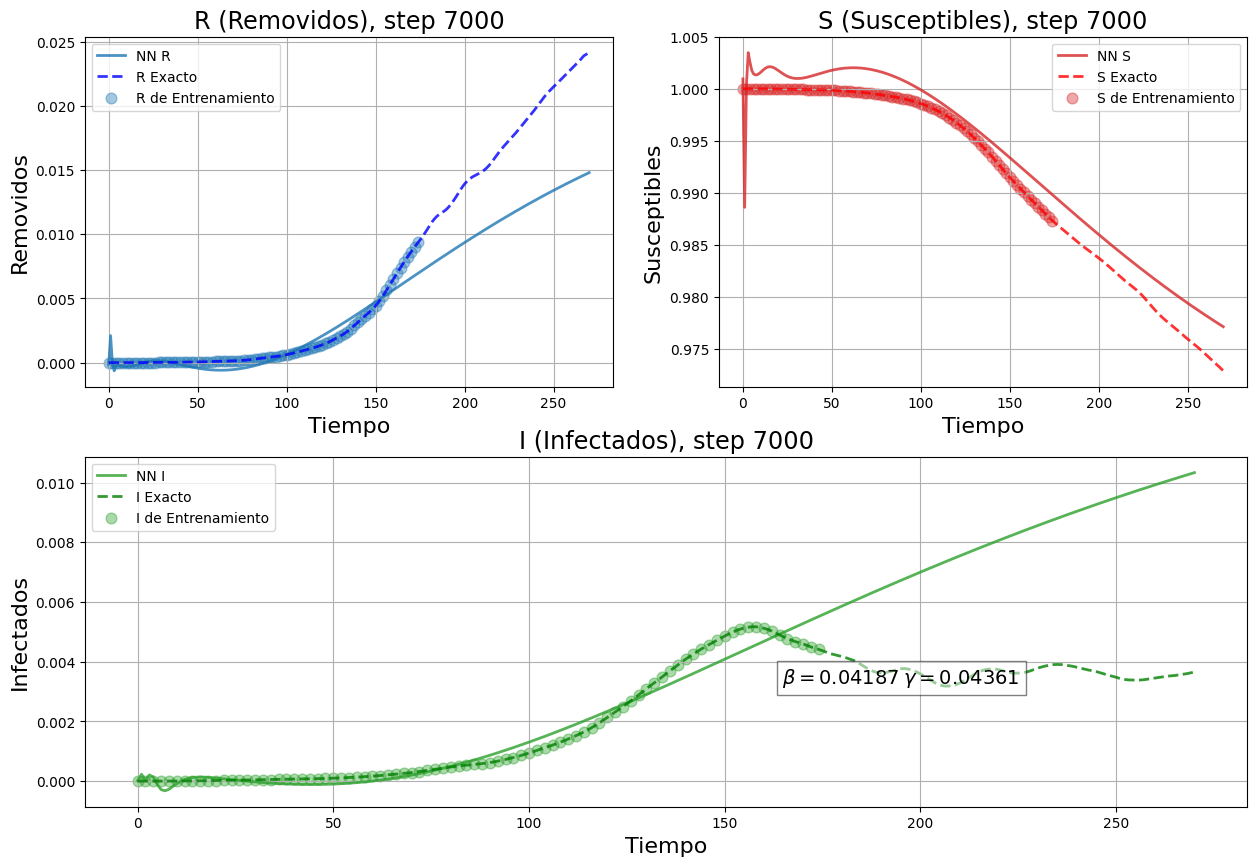

step = 7000 , loss1 = 1.6236049e-06 , loss2 = 1.2430147e-08 , loss = 1.6360351e-06 , mse = 9.152803e-06 , beta = 0.018614328 , gamma = 0.011232866
step = 8000 , loss1 = 5.712294e-07 , loss2 = 1.0078419e-08 , loss = 5.813078e-07 , mse = 7.4049135e-06 , beta = 0.019219732 , gamma = 0.011853701
step = 9000 , loss1 = 2.1054937e-07 , loss2 = 8.29133e-09 , loss = 2.1884071e-07 , mse = 6.012558e-06 , beta = 0.019806542 , gamma = 0.0124427825
step = 10000 , loss1 = 2.0470975e-07 , loss2 = 7.686859e-09 , loss = 2.1239661e-07 , mse = 5.5426417e-06 , beta = 0.020448757 , gamma = 0.013078614
step = 11000 , loss1 = 7.233764e-07 , loss2 = 8.807178e-09 , loss = 7.321836e-07 , mse = 5.254571e-06 , beta = 0.020674417 , gamma = 0.013376931
step = 12000 , loss1 = 1.5046008e-07 , loss2 = 6.982483e-09 , loss = 1.5744257e-07 , mse = 4.9151677e-06 , beta = 0.02179492 , gamma = 0.014361839
step = 13000 , loss1 = 3.4684847e-06 , loss2 = 1.2121028e-08 , loss = 3.4806058e-06 , mse = 9.393492e-06 , beta = 0.02221

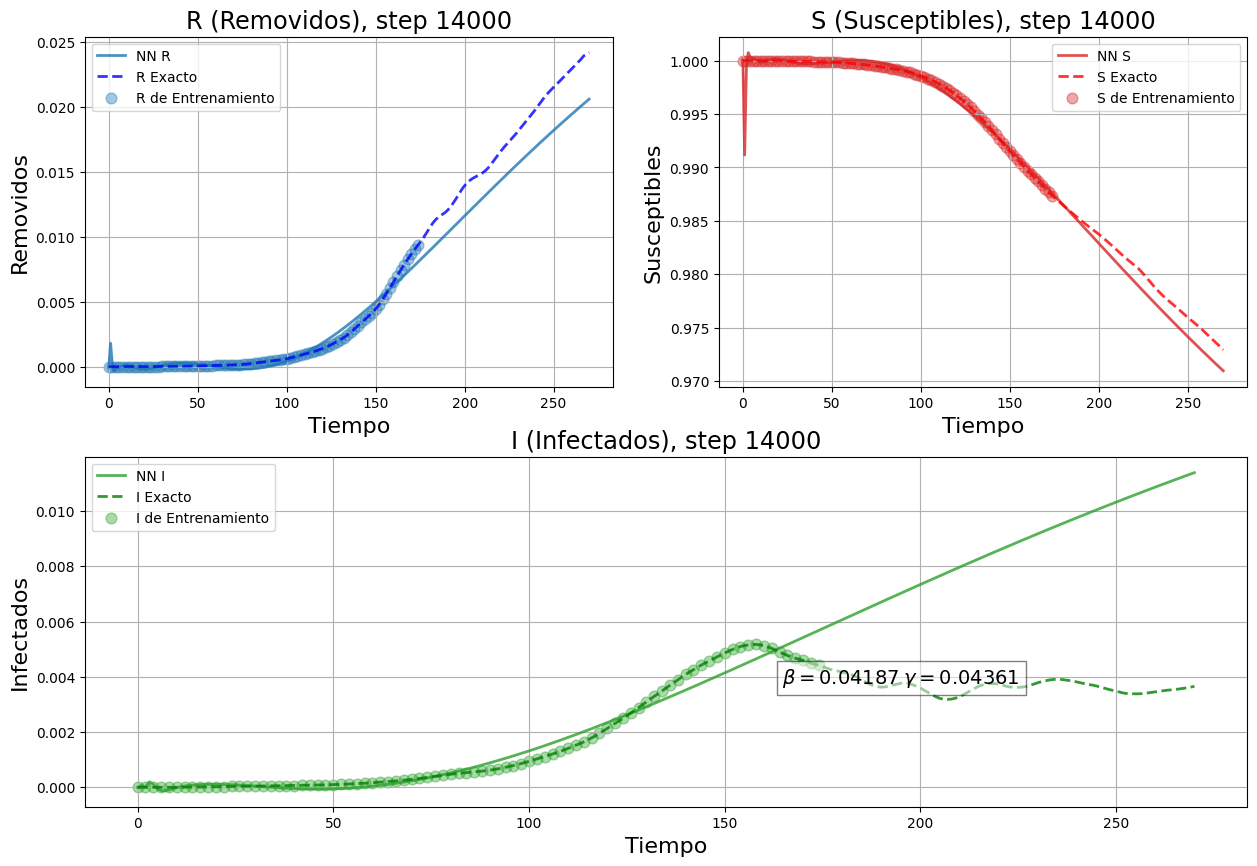

step = 14000 , loss1 = 1.3449346e-07 , loss2 = 6.074328e-09 , loss = 1.4056779e-07 , mse = 4.55704e-06 , beta = 0.022772197 , gamma = 0.015327181
step = 15000 , loss1 = 1.2583078e-07 , loss2 = 5.805848e-09 , loss = 1.3163663e-07 , mse = 4.4892054e-06 , beta = 0.023196576 , gamma = 0.015766468
step = 16000 , loss1 = 1.3732954e-07 , loss2 = 5.5619145e-09 , loss = 1.4289145e-07 , mse = 4.631325e-06 , beta = 0.023743268 , gamma = 0.016235549
step = 17000 , loss1 = 1.181838e-07 , loss2 = 5.3773523e-09 , loss = 1.2356115e-07 , mse = 4.4290587e-06 , beta = 0.023737332 , gamma = 0.016301407
step = 18000 , loss1 = 1.12958766e-07 , loss2 = 5.103905e-09 , loss = 1.1806267e-07 , mse = 4.3585046e-06 , beta = 0.02406975 , gamma = 0.016672354
step = 19000 , loss1 = 1.13997785e-07 , loss2 = 5.02877e-09 , loss = 1.1902655e-07 , mse = 4.303305e-06 , beta = 0.024226826 , gamma = 0.016866483
step = 20000 , loss1 = 1.3801363e-07 , loss2 = 5.1598406e-09 , loss = 1.4317348e-07 , mse = 4.641379e-06 , beta = 0

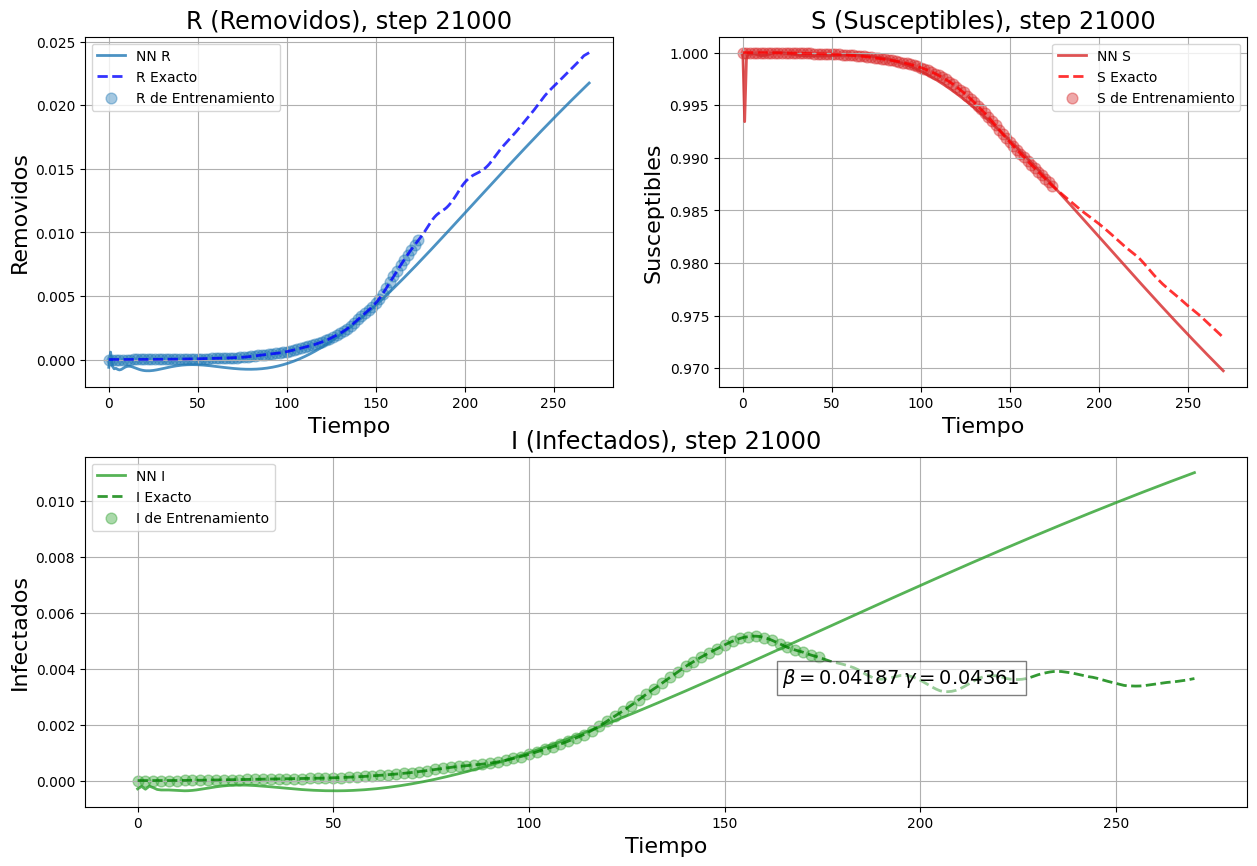

step = 21000 , loss1 = 6.3039647e-07 , loss2 = 4.114071e-09 , loss = 6.3451057e-07 , mse = 4.269208e-06 , beta = 0.024025317 , gamma = 0.016898455
step = 22000 , loss1 = 1.2245614e-07 , loss2 = 4.624697e-09 , loss = 1.2708084e-07 , mse = 4.6753894e-06 , beta = 0.02531354 , gamma = 0.017733125
step = 23000 , loss1 = 1.0305847e-07 , loss2 = 4.413547e-09 , loss = 1.0747202e-07 , mse = 4.1458075e-06 , beta = 0.025252523 , gamma = 0.017918266
step = 24000 , loss1 = 9.9507005e-08 , loss2 = 4.4370903e-09 , loss = 1.03944096e-07 , mse = 4.426566e-06 , beta = 0.025238492 , gamma = 0.017869085
step = 25000 , loss1 = 1.6362723e-07 , loss2 = 4.270623e-09 , loss = 1.6789785e-07 , mse = 4.9708265e-06 , beta = 0.024990397 , gamma = 0.017407807
step = 26000 , loss1 = 1.3701826e-07 , loss2 = 4.2941233e-09 , loss = 1.4131238e-07 , mse = 4.1630997e-06 , beta = 0.02582412 , gamma = 0.018441577
step = 27000 , loss1 = 5.843225e-07 , loss2 = 4.0254386e-09 , loss = 5.883479e-07 , mse = 5.4194393e-06 , beta = 

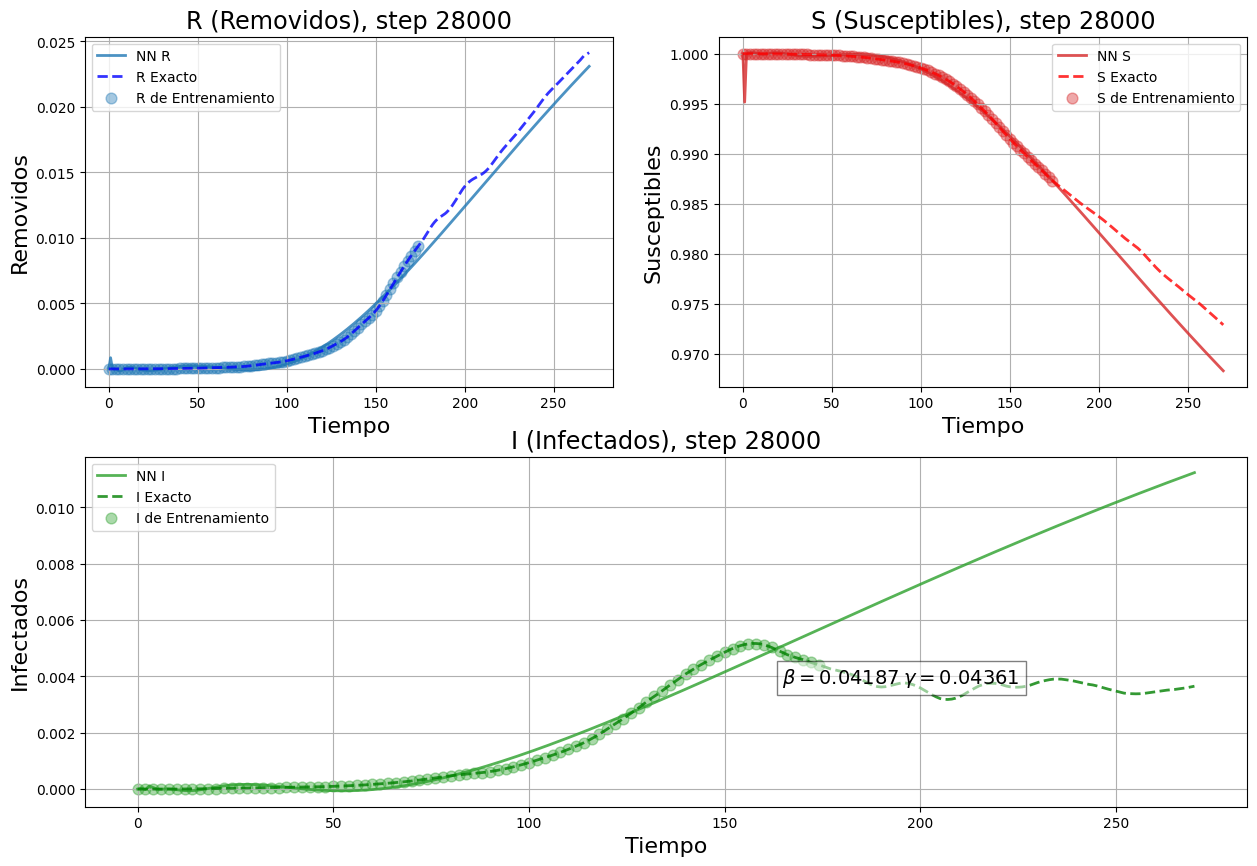

step = 28000 , loss1 = 9.914654e-08 , loss2 = 4.009883e-09 , loss = 1.03156424e-07 , mse = 4.4556523e-06 , beta = 0.025724292 , gamma = 0.018152183
step = 29000 , loss1 = 9.8596004e-08 , loss2 = 3.996315e-09 , loss = 1.0259232e-07 , mse = 4.5596294e-06 , beta = 0.025660647 , gamma = 0.018067712
step = 30000 , loss1 = 2.4816827e-06 , loss2 = 5.371856e-09 , loss = 2.4870546e-06 , mse = 8.6488835e-06 , beta = 0.02661421 , gamma = 0.019046137
step = 31000 , loss1 = 9.164746e-08 , loss2 = 3.827757e-09 , loss = 9.5475215e-08 , mse = 4.4285057e-06 , beta = 0.026743958 , gamma = 0.01926962
step = 32000 , loss1 = 9.381117e-08 , loss2 = 3.809287e-09 , loss = 9.762046e-08 , mse = 4.623988e-06 , beta = 0.026393522 , gamma = 0.018757056
step = 33000 , loss1 = 3.5622213e-06 , loss2 = 6.6040973e-09 , loss = 3.5688254e-06 , mse = 5.6148847e-06 , beta = 0.027081285 , gamma = 0.019554634
step = 34000 , loss1 = 8.871185e-08 , loss2 = 3.7079366e-09 , loss = 9.241979e-08 , mse = 4.7008684e-06 , beta = 0.02

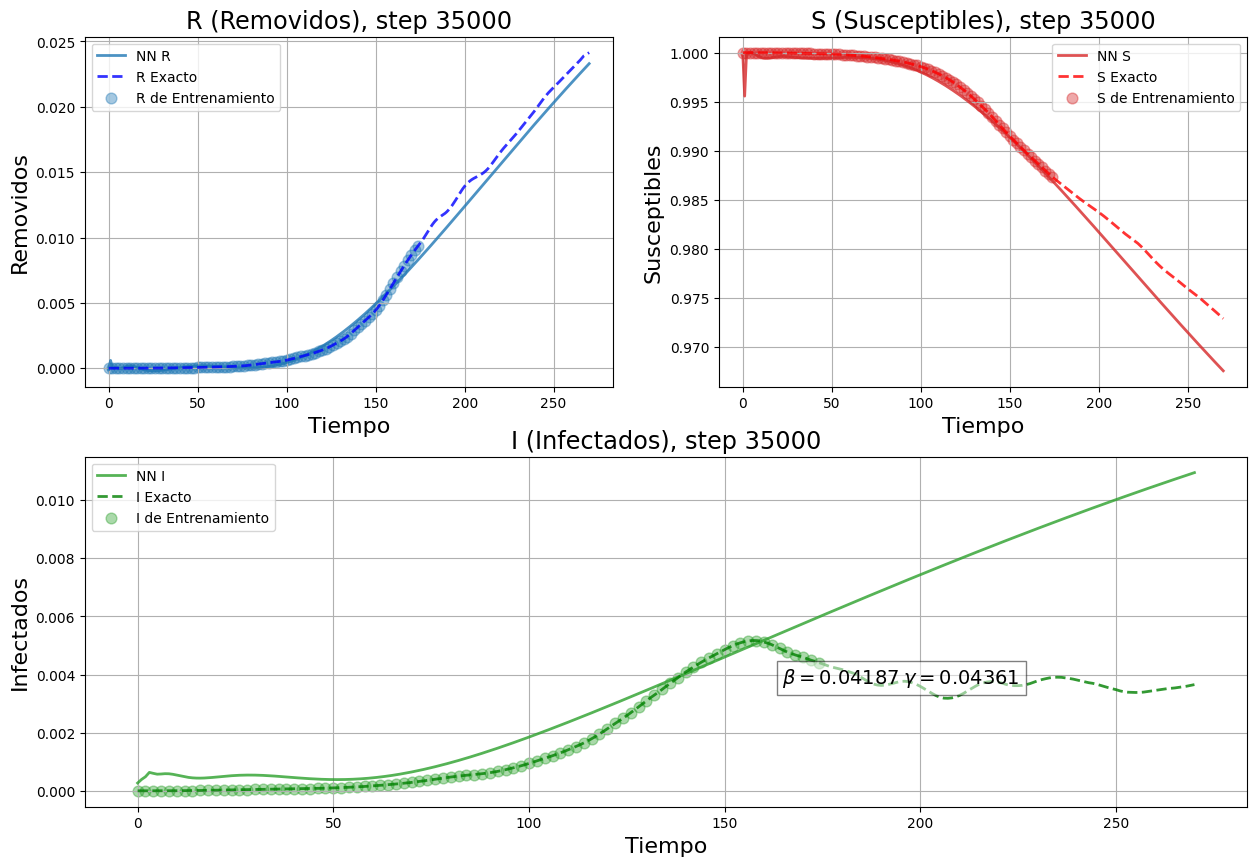

step = 35000 , loss1 = 2.4655006e-07 , loss2 = 3.9491566e-09 , loss = 2.5049923e-07 , mse = 4.837442e-06 , beta = 0.02644855 , gamma = 0.019028652
step = 36000 , loss1 = 1.0191102e-07 , loss2 = 3.7755266e-09 , loss = 1.05686546e-07 , mse = 4.746805e-06 , beta = 0.02575208 , gamma = 0.018032154
step = 37000 , loss1 = 7.4139152e-06 , loss2 = 1.1065415e-08 , loss = 7.4249806e-06 , mse = 1.0519842e-05 , beta = 0.027675122 , gamma = 0.020047147
step = 38000 , loss1 = 8.419194e-08 , loss2 = 3.4730663e-09 , loss = 8.766501e-08 , mse = 4.793912e-06 , beta = 0.02803829 , gamma = 0.020425767
step = 39000 , loss1 = 8.643318e-08 , loss2 = 3.4197116e-09 , loss = 8.98529e-08 , mse = 4.7984504e-06 , beta = 0.02780265 , gamma = 0.020104533
step = 40000 , loss1 = 8.8281375e-08 , loss2 = 3.275806e-09 , loss = 9.155718e-08 , mse = 4.9998334e-06 , beta = 0.028349116 , gamma = 0.020724831
step = 41000 , loss1 = 8.645081e-08 , loss2 = 3.2301846e-09 , loss = 8.9680995e-08 , mse = 4.799691e-06 , beta = 0.0283

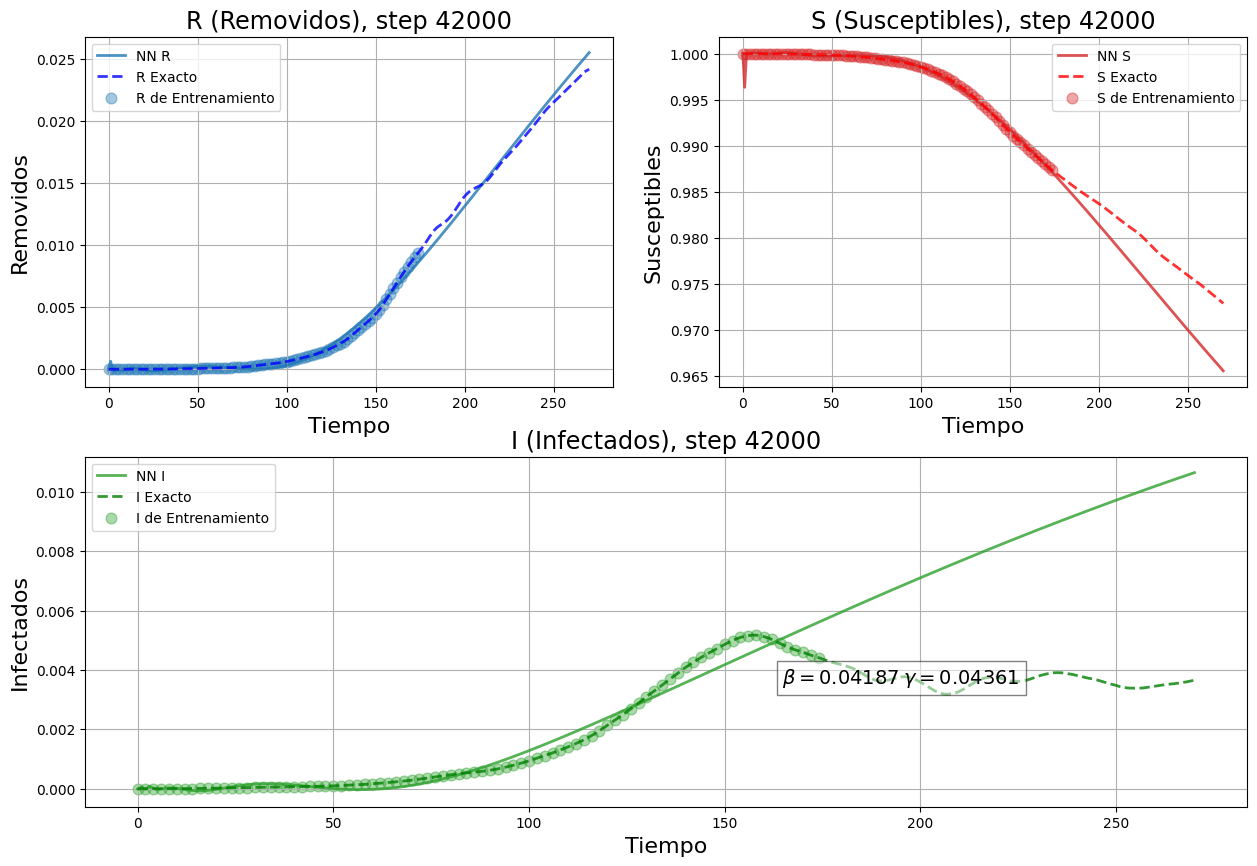

step = 42000 , loss1 = 7.742559e-08 , loss2 = 3.1362992e-09 , loss = 8.056189e-08 , mse = 5.217036e-06 , beta = 0.029460732 , gamma = 0.021745041
step = 43000 , loss1 = 8.3860805e-08 , loss2 = 3.0275324e-09 , loss = 8.6888335e-08 , mse = 5.1983343e-06 , beta = 0.029966267 , gamma = 0.022228295
step = 44000 , loss1 = 1.363406e-07 , loss2 = 2.8237923e-09 , loss = 1.391644e-07 , mse = 6.1908986e-06 , beta = 0.03053323 , gamma = 0.022661481
step = 45000 , loss1 = 7.472198e-08 , loss2 = 2.6559883e-09 , loss = 7.737797e-08 , mse = 5.5605396e-06 , beta = 0.03097447 , gamma = 0.023100447
step = 46000 , loss1 = 7.164466e-08 , loss2 = 2.5202576e-09 , loss = 7.416492e-08 , mse = 5.9718705e-06 , beta = 0.03183106 , gamma = 0.023923272
step = 47000 , loss1 = 7.220421e-08 , loss2 = 2.3271909e-09 , loss = 7.45314e-08 , mse = 6.6407188e-06 , beta = 0.032723457 , gamma = 0.024704639
step = 48000 , loss1 = 9.000751e-08 , loss2 = 2.0278144e-09 , loss = 9.203532e-08 , mse = 6.6393955e-06 , beta = 0.034150

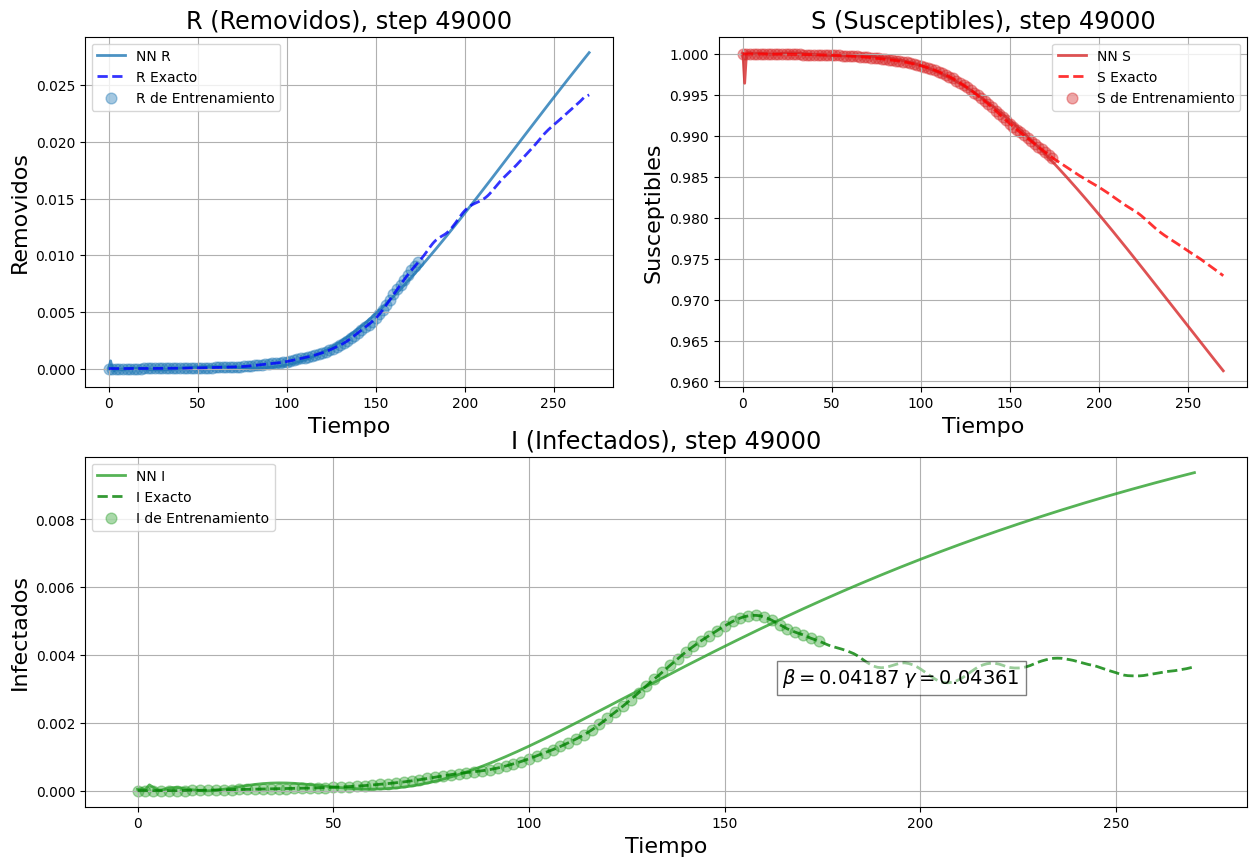

step = 49000 , loss1 = 6.587641e-08 , loss2 = 1.8894162e-09 , loss = 6.7765825e-08 , mse = 7.96335e-06 , beta = 0.036036503 , gamma = 0.027693093
step = 50000 , loss1 = 6.238641e-08 , loss2 = 1.6004473e-09 , loss = 6.398686e-08 , mse = 8.128293e-06 , beta = 0.03705628 , gamma = 0.028965168
step = 51000 , loss1 = 4.559854e-07 , loss2 = 2.3891122e-09 , loss = 4.583745e-07 , mse = 9.125319e-06 , beta = 0.039069 , gamma = 0.031056248
step = 52000 , loss1 = 8.0812576e-08 , loss2 = 1.2230628e-09 , loss = 8.203564e-08 , mse = 9.545834e-06 , beta = 0.040582992 , gamma = 0.03268557
step = 53000 , loss1 = 5.4150732e-08 , loss2 = 1.0552184e-09 , loss = 5.5205952e-08 , mse = 9.925211e-06 , beta = 0.04290776 , gamma = 0.035361893
step = 54000 , loss1 = 7.454434e-08 , loss2 = 1.1382841e-09 , loss = 7.568262e-08 , mse = 1.0360862e-05 , beta = 0.04510175 , gamma = 0.037550684
step = 55000 , loss1 = 7.0213765e-08 , loss2 = 1.2990433e-09 , loss = 7.151281e-08 , mse = 1.145224e-05 , beta = 0.04632587 , g

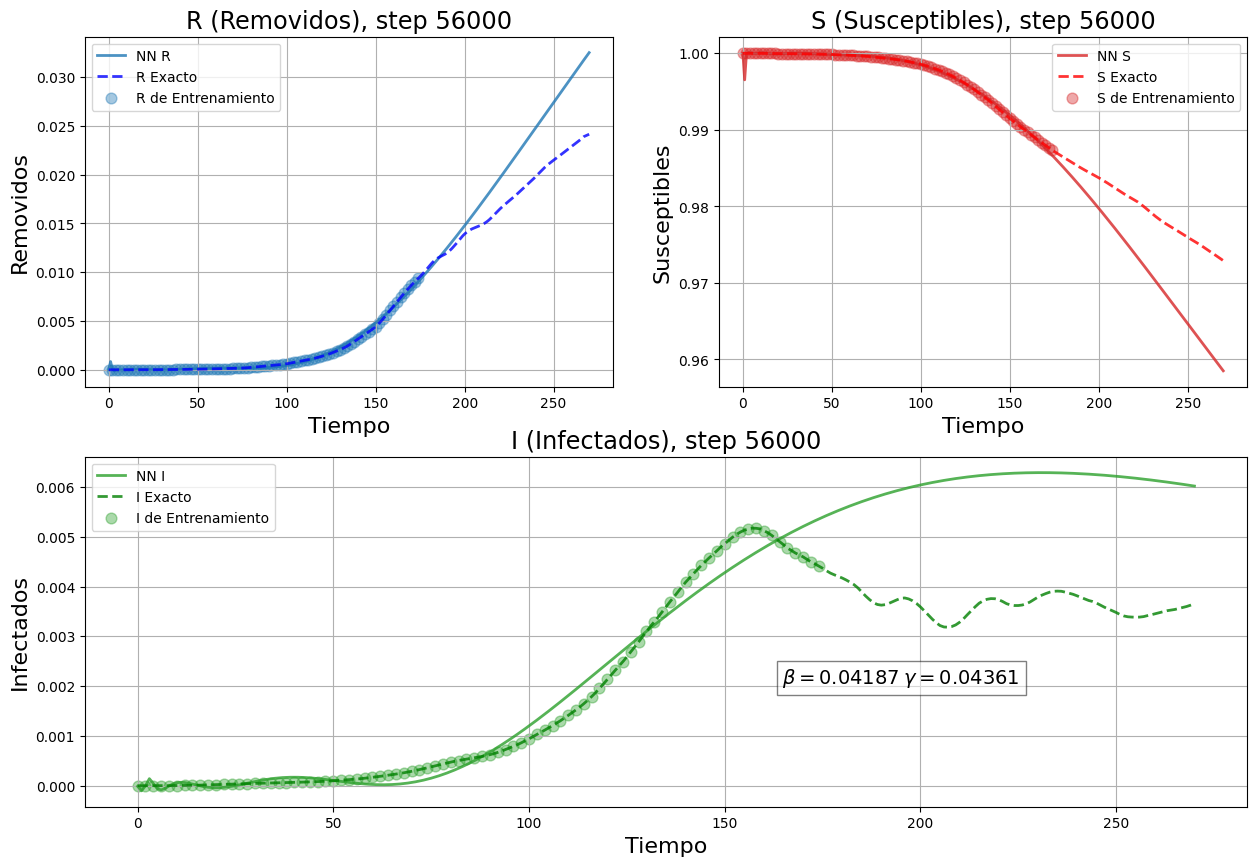

step = 56000 , loss1 = 4.9025157e-08 , loss2 = 1.317419e-09 , loss = 5.0342575e-08 , mse = 1.1180991e-05 , beta = 0.047391918 , gamma = 0.040716875
step = 57000 , loss1 = 6.21005e-08 , loss2 = 1.6962298e-09 , loss = 6.3796726e-08 , mse = 1.1822345e-05 , beta = 0.04847627 , gamma = 0.042281017
step = 58000 , loss1 = 6.9022654e-08 , loss2 = 1.8284226e-09 , loss = 7.085108e-08 , mse = 1.2247379e-05 , beta = 0.049606357 , gamma = 0.043226678
step = 59000 , loss1 = 4.2129489e-07 , loss2 = 3.811647e-09 , loss = 4.2510652e-07 , mse = 1.2310831e-05 , beta = 0.049759146 , gamma = 0.04404564
step = 60000 , loss1 = 7.205254e-07 , loss2 = 2.266194e-09 , loss = 7.227916e-07 , mse = 1.50259875e-05 , beta = 0.04932376 , gamma = 0.04406822
step = 61000 , loss1 = 9.88818e-07 , loss2 = 4.649851e-09 , loss = 9.934679e-07 , mse = 1.3354852e-05 , beta = 0.04919967 , gamma = 0.04409693
step = 62000 , loss1 = 7.24943e-08 , loss2 = 1.9207194e-09 , loss = 7.441502e-08 , mse = 1.1565735e-05 , beta = 0.049817763

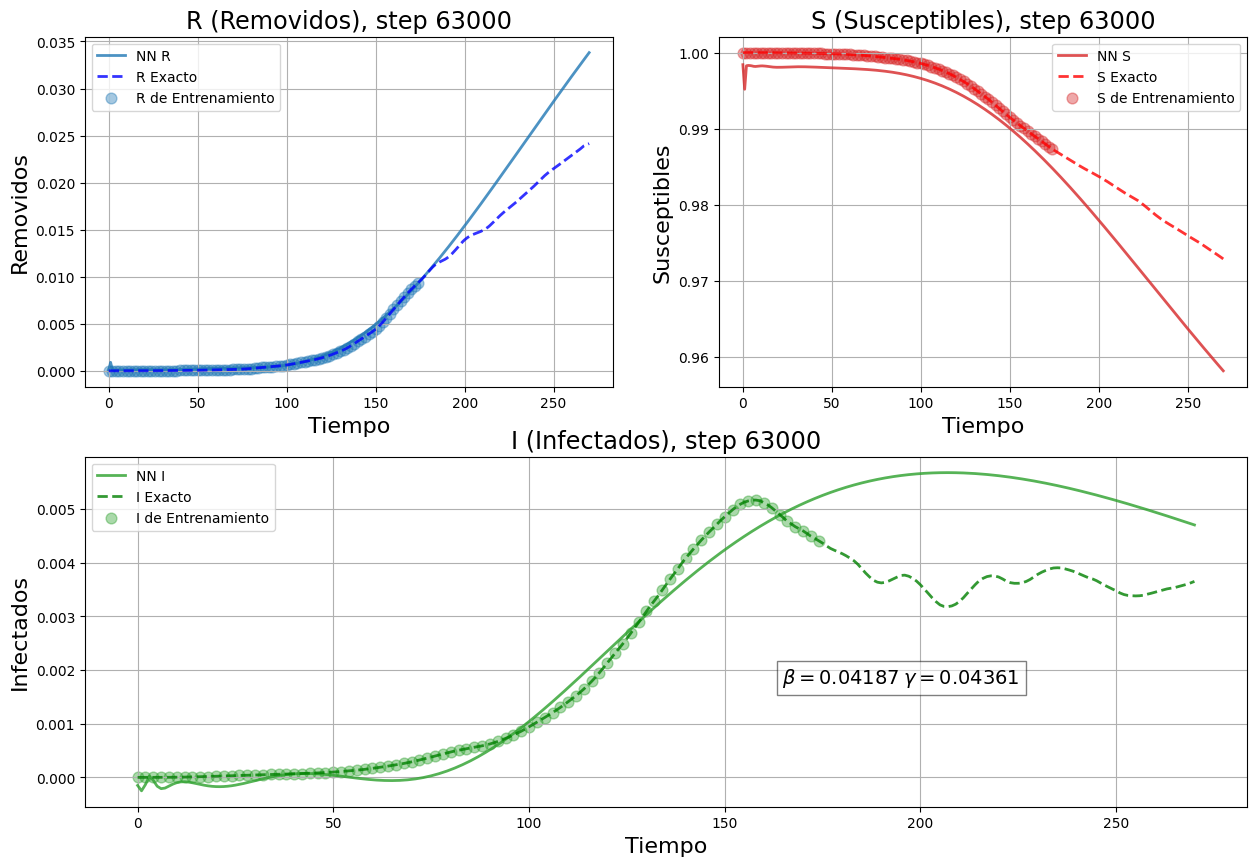

step = 63000 , loss1 = 1.1990045e-06 , loss2 = 2.0075799e-09 , loss = 1.2010121e-06 , mse = 1.47417595e-05 , beta = 0.049715396 , gamma = 0.044720165
step = 64000 , loss1 = 4.1415355e-08 , loss2 = 1.7608396e-09 , loss = 4.3176193e-08 , mse = 1.03555085e-05 , beta = 0.04917218 , gamma = 0.044333447
step = 65000 , loss1 = 4.0818115e-08 , loss2 = 1.7729846e-09 , loss = 4.25911e-08 , mse = 9.972565e-06 , beta = 0.049104188 , gamma = 0.044500336
step = 66000 , loss1 = 6.840049e-08 , loss2 = 2.1009823e-09 , loss = 7.050147e-08 , mse = 9.597679e-06 , beta = 0.04889097 , gamma = 0.044639982
step = 67000 , loss1 = 4.0271964e-08 , loss2 = 1.763778e-09 , loss = 4.203574e-08 , mse = 9.562868e-06 , beta = 0.048875507 , gamma = 0.044637047
step = 68000 , loss1 = 5.390866e-08 , loss2 = 1.8312869e-09 , loss = 5.5739946e-08 , mse = 8.833207e-06 , beta = 0.048498336 , gamma = 0.044455297
step = 69000 , loss1 = 4.3400945e-08 , loss2 = 1.7283295e-09 , loss = 4.5129276e-08 , mse = 8.797215e-06 , beta = 0.0

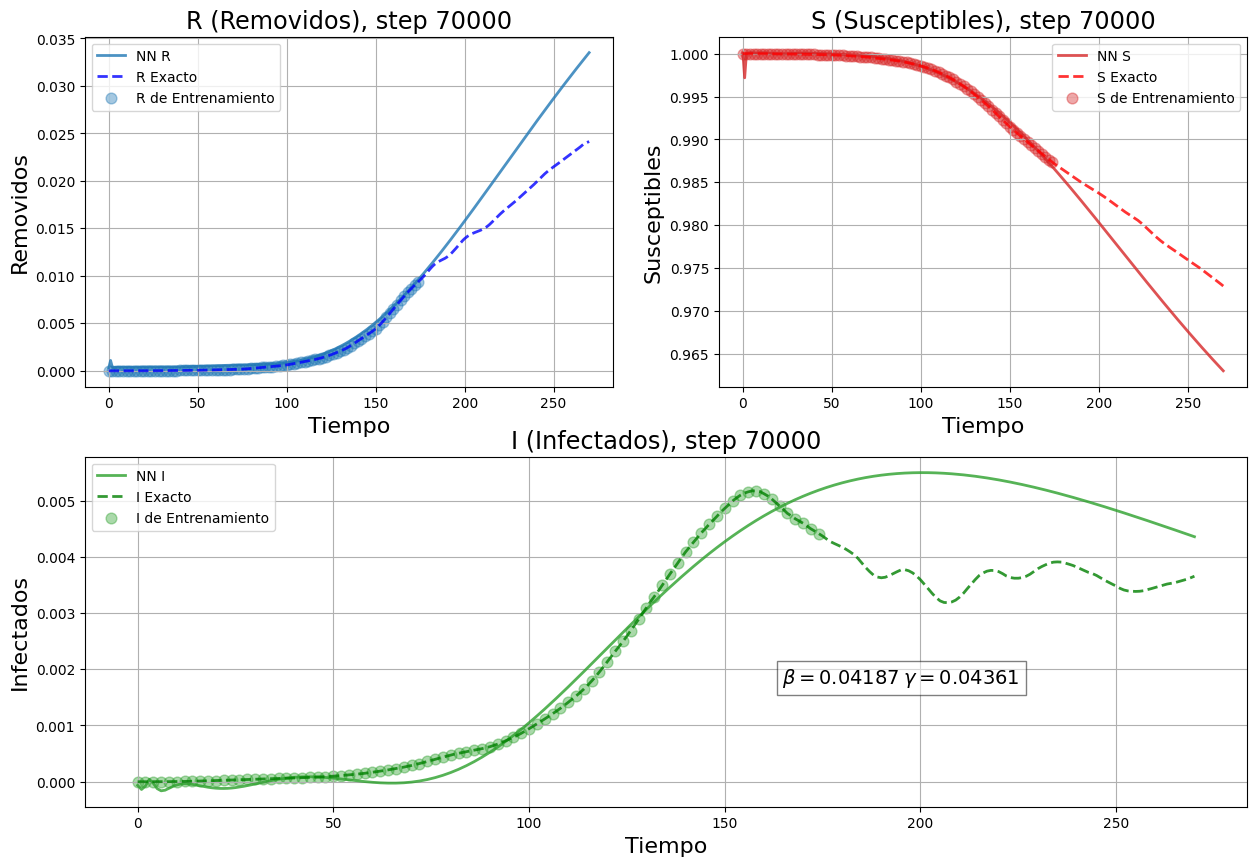

step = 70000 , loss1 = 7.344311e-08 , loss2 = 1.7361947e-09 , loss = 7.517931e-08 , mse = 8.286372e-06 , beta = 0.047744587 , gamma = 0.044221442
step = 71000 , loss1 = 8.673602e-08 , loss2 = 2.3076971e-09 , loss = 8.904372e-08 , mse = 8.134721e-06 , beta = 0.04744004 , gamma = 0.04418875
step = 72000 , loss1 = 4.9564886e-08 , loss2 = 1.7962571e-09 , loss = 5.136114e-08 , mse = 7.090838e-06 , beta = 0.04745749 , gamma = 0.04421654
step = 73000 , loss1 = 2.6816798e-07 , loss2 = 1.787541e-09 , loss = 2.6995554e-07 , mse = 8.555223e-06 , beta = 0.047067992 , gamma = 0.043926906
step = 74000 , loss1 = 5.7967032e-08 , loss2 = 1.7876838e-09 , loss = 5.975472e-08 , mse = 6.2123286e-06 , beta = 0.046575136 , gamma = 0.043541014
step = 75000 , loss1 = 3.3967087e-08 , loss2 = 1.6611114e-09 , loss = 3.5628197e-08 , mse = 6.3279663e-06 , beta = 0.046487644 , gamma = 0.04370347
step = 76000 , loss1 = 3.2804383e-08 , loss2 = 1.6923835e-09 , loss = 3.4496768e-08 , mse = 6.1302458e-06 , beta = 0.04631

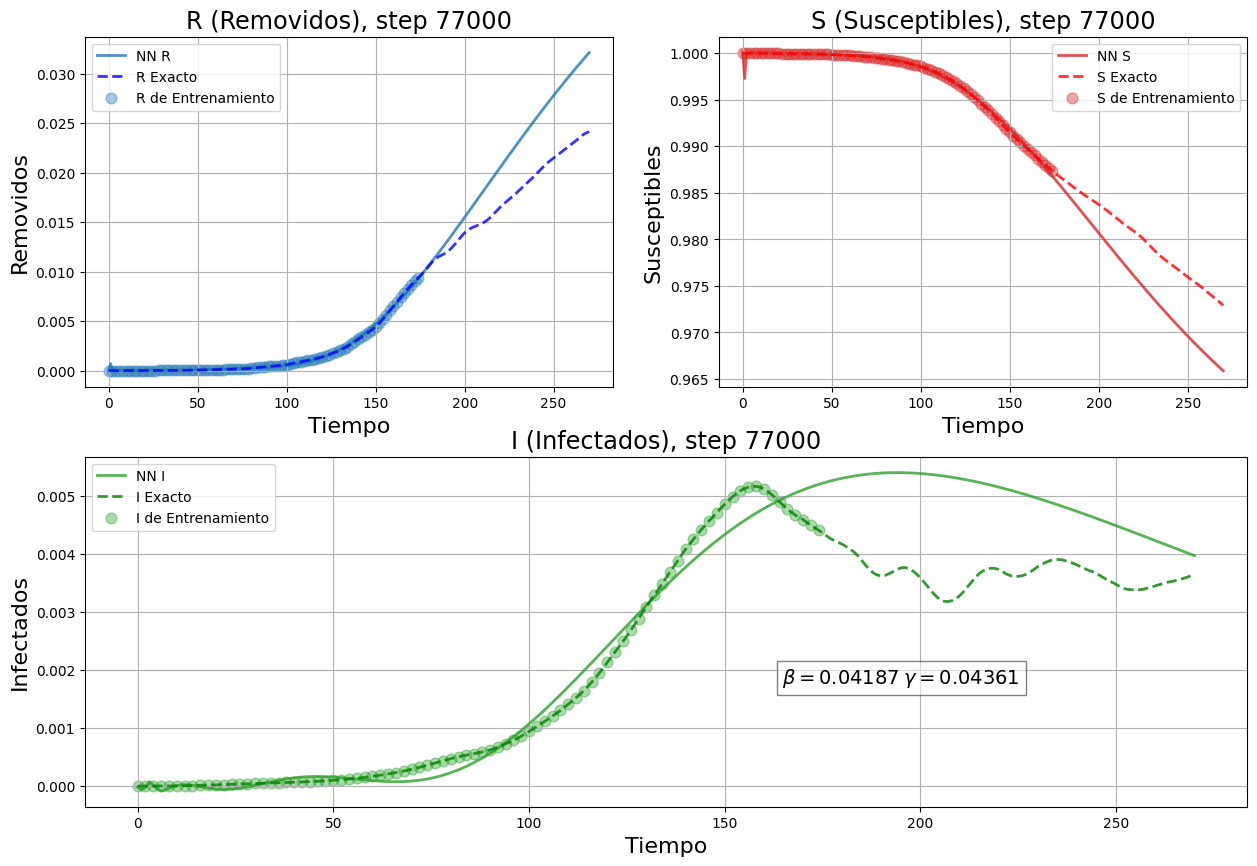

step = 77000 , loss1 = 3.24991e-08 , loss2 = 1.6968088e-09 , loss = 3.4195907e-08 , mse = 5.636915e-06 , beta = 0.04593076 , gamma = 0.043500707
step = 78000 , loss1 = 1.1756541e-06 , loss2 = 1.8908883e-09 , loss = 1.177545e-06 , mse = 3.8464505e-06 , beta = 0.045416743 , gamma = 0.043135848
step = 79000 , loss1 = 8.2638934e-08 , loss2 = 1.8052745e-09 , loss = 8.444421e-08 , mse = 5.5701175e-06 , beta = 0.04564368 , gamma = 0.043630466
step = 80000 , loss1 = 1.5480173e-07 , loss2 = 1.808011e-09 , loss = 1.5660973e-07 , mse = 5.841956e-06 , beta = 0.045198347 , gamma = 0.043410424
step = 81000 , loss1 = 8.6608566e-08 , loss2 = 2.0121873e-09 , loss = 8.862075e-08 , mse = 3.881115e-06 , beta = 0.04520607 , gamma = 0.04369682
step = 82000 , loss1 = 2.85092e-08 , loss2 = 1.8877662e-09 , loss = 3.0396965e-08 , mse = 4.185958e-06 , beta = 0.044736262 , gamma = 0.04335554
step = 83000 , loss1 = 3.6985195e-08 , loss2 = 1.9447068e-09 , loss = 3.89299e-08 , mse = 3.644669e-06 , beta = 0.04460576 

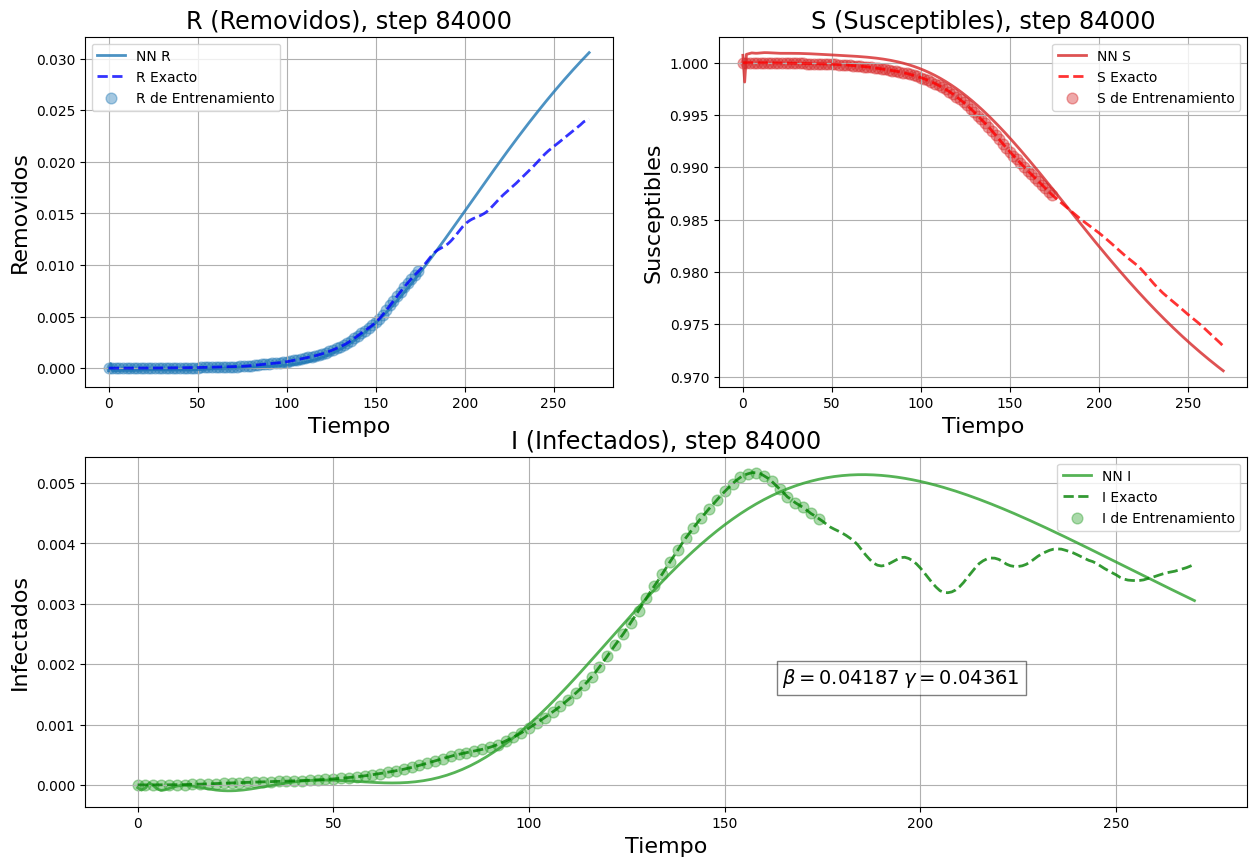

step = 84000 , loss1 = 4.7861454e-07 , loss2 = 2.143719e-09 , loss = 4.807583e-07 , mse = 2.6395446e-06 , beta = 0.044204466 , gamma = 0.043426685
step = 85000 , loss1 = 1.0368967e-07 , loss2 = 2.115908e-09 , loss = 1.0580558e-07 , mse = 2.7042752e-06 , beta = 0.043990355 , gamma = 0.043427195
step = 86000 , loss1 = 5.8967083e-07 , loss2 = 2.5909392e-09 , loss = 5.9226176e-07 , mse = 2.1521414e-06 , beta = 0.043667212 , gamma = 0.043508094
step = 87000 , loss1 = 5.869082e-07 , loss2 = 2.7334504e-09 , loss = 5.896416e-07 , mse = 4.454728e-06 , beta = 0.04360634 , gamma = 0.043819223
step = 88000 , loss1 = 5.48964e-08 , loss2 = 2.5772826e-09 , loss = 5.7473684e-08 , mse = 2.2454485e-06 , beta = 0.04347751 , gamma = 0.04393474
step = 89000 , loss1 = 6.562723e-08 , loss2 = 2.8770462e-09 , loss = 6.850428e-08 , mse = 2.1733194e-06 , beta = 0.043370724 , gamma = 0.04408889
step = 90000 , loss1 = 4.5809165e-07 , loss2 = 3.5169703e-09 , loss = 4.616086e-07 , mse = 1.8362356e-06 , beta = 0.0430

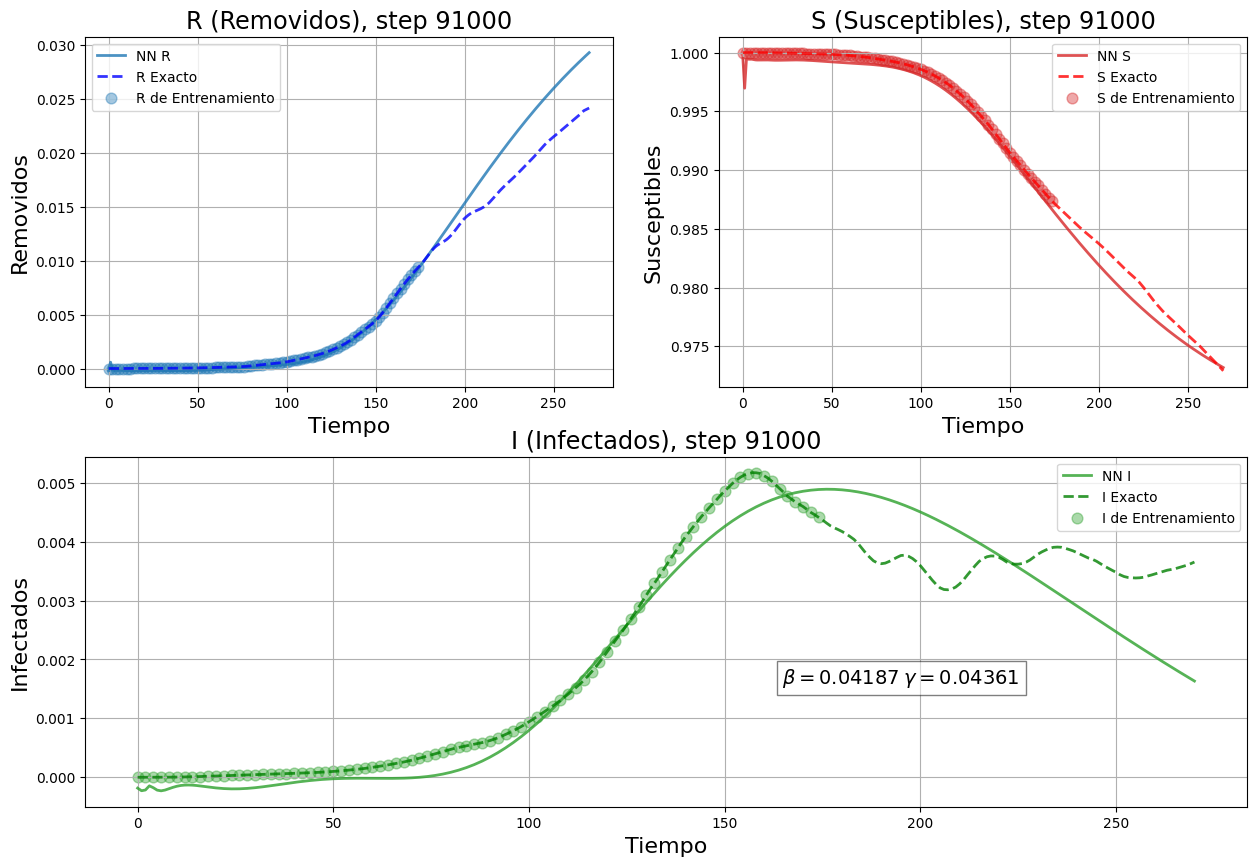

step = 91000 , loss1 = 4.6953264e-08 , loss2 = 3.3750904e-09 , loss = 5.0328353e-08 , mse = 1.8523239e-06 , beta = 0.04279634 , gamma = 0.044185057
step = 92000 , loss1 = 2.2971427e-08 , loss2 = 3.3500536e-09 , loss = 2.632148e-08 , mse = 1.7715247e-06 , beta = 0.042677157 , gamma = 0.044108603
step = 93000 , loss1 = 3.5056203e-07 , loss2 = 3.5897976e-09 , loss = 3.5415184e-07 , mse = 2.5297338e-06 , beta = 0.04250887 , gamma = 0.04421295
step = 94000 , loss1 = 2.5415935e-07 , loss2 = 3.7120573e-09 , loss = 2.578714e-07 , mse = 1.3592979e-06 , beta = 0.04236849 , gamma = 0.04415117
step = 95000 , loss1 = 1.666553e-08 , loss2 = 3.5840557e-09 , loss = 2.0249585e-08 , mse = 1.4606677e-06 , beta = 0.04231339 , gamma = 0.044073652
step = 96000 , loss1 = 1.5337898e-08 , loss2 = 3.6099657e-09 , loss = 1.8947864e-08 , mse = 1.4549344e-06 , beta = 0.042165443 , gamma = 0.043946866
step = 97000 , loss1 = 1.5723982e-08 , loss2 = 3.5564893e-09 , loss = 1.928047e-08 , mse = 1.3209271e-06 , beta = 0

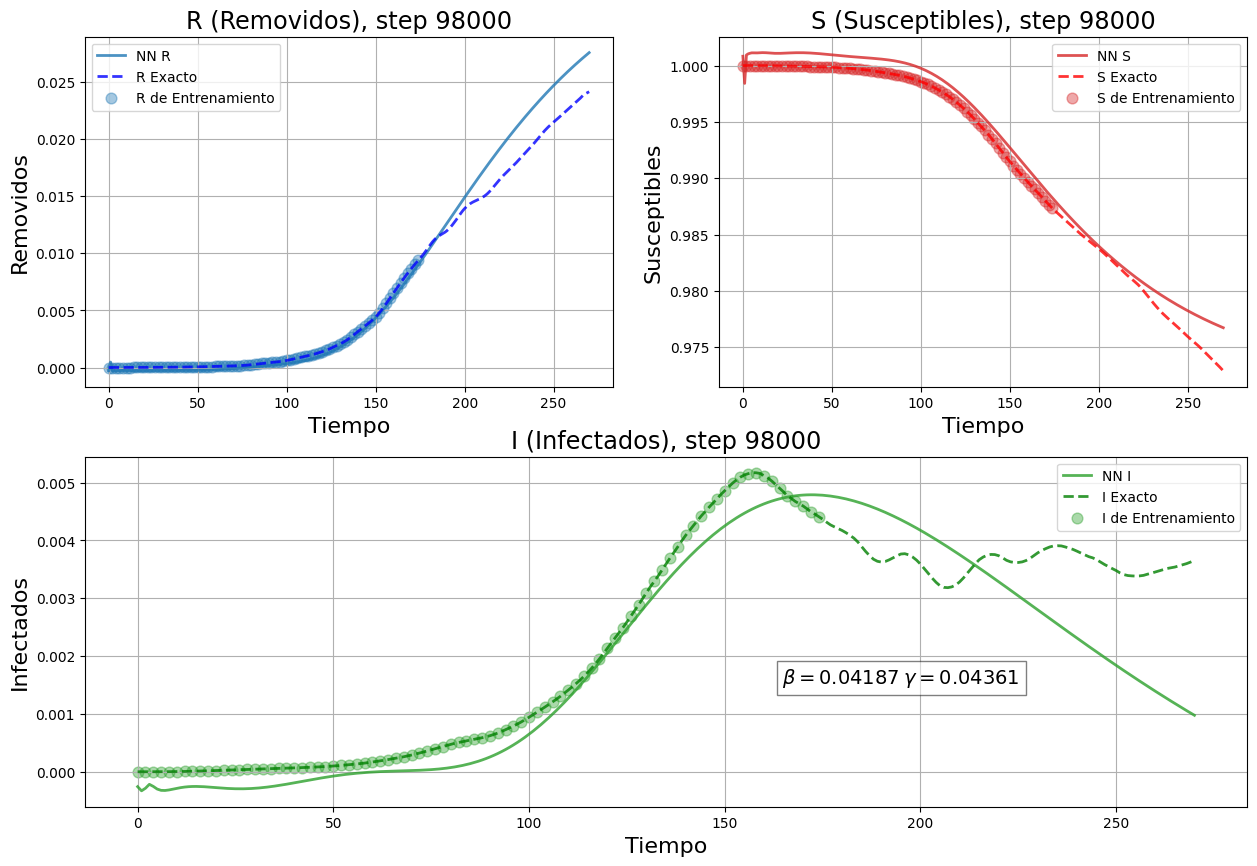

step = 98000 , loss1 = 4.503883e-07 , loss2 = 3.701053e-09 , loss = 4.5408936e-07 , mse = 1.5794062e-06 , beta = 0.04210199 , gamma = 0.043929677
step = 99000 , loss1 = 1.3065833e-08 , loss2 = 3.6703862e-09 , loss = 1.673622e-08 , mse = 1.3622131e-06 , beta = 0.04202514 , gamma = 0.0438752
step = 100000 , loss1 = 1.4321874e-08 , loss2 = 3.6177128e-09 , loss = 1.7939588e-08 , mse = 1.3266161e-06 , beta = 0.04187587 , gamma = 0.043684967
step = 101000 , loss1 = 1.9969397e-08 , loss2 = 3.629314e-09 , loss = 2.359871e-08 , mse = 1.2331749e-06 , beta = 0.04182091 , gamma = 0.04365493
step = 102000 , loss1 = 1.7530351e-07 , loss2 = 4.2106336e-09 , loss = 1.7951415e-07 , mse = 2.1311043e-06 , beta = 0.041945353 , gamma = 0.04375636
step = 103000 , loss1 = 1.2256456e-06 , loss2 = 4.302298e-09 , loss = 1.2299479e-06 , mse = 2.9235919e-06 , beta = 0.041997287 , gamma = 0.043835267
step = 104000 , loss1 = 1.8858375e-07 , loss2 = 4.142121e-09 , loss = 1.9272588e-07 , mse = 1.8612375e-06 , beta = 0

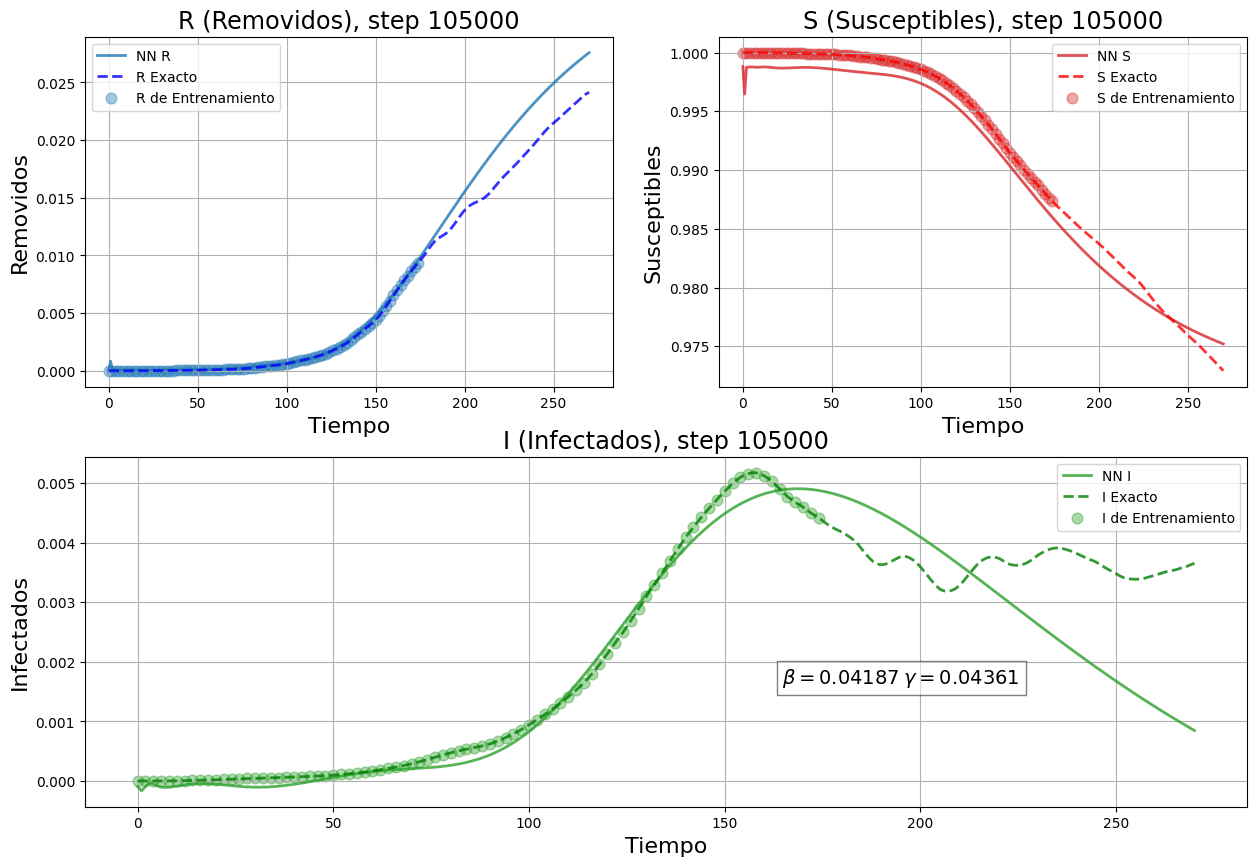

step = 105000 , loss1 = 4.3323817e-07 , loss2 = 3.5987773e-09 , loss = 4.3683696e-07 , mse = 1.7793575e-06 , beta = 0.041924033 , gamma = 0.04372641
step = 106000 , loss1 = 1.4609441e-08 , loss2 = 3.5684629e-09 , loss = 1.8177904e-08 , mse = 1.1455915e-06 , beta = 0.041775838 , gamma = 0.04355484
step = 107000 , loss1 = 2.2246095e-08 , loss2 = 3.5913053e-09 , loss = 2.58374e-08 , mse = 1.3394415e-06 , beta = 0.041684955 , gamma = 0.043457747
step = 108000 , loss1 = 1.1649842e-08 , loss2 = 3.5499368e-09 , loss = 1.519978e-08 , mse = 1.200344e-06 , beta = 0.041813366 , gamma = 0.04361242
step = 109000 , loss1 = 3.4945e-08 , loss2 = 3.8902637e-09 , loss = 3.8835264e-08 , mse = 1.2939466e-06 , beta = 0.041070364 , gamma = 0.042850133
step = 110000 , loss1 = 1.0899523e-08 , loss2 = 3.5151064e-09 , loss = 1.44146295e-08 , mse = 1.1756023e-06 , beta = 0.041828312 , gamma = 0.043607417


In [7]:
# Define device
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Your data tensors
x_data = colom_t_train.to(DEVICE)
y_data = colom_data_train.to(DEVICE)
x = colom_t.to(DEVICE)
y = colom_data.to(DEVICE)

# ......................
N = 1.0
torch.manual_seed(123)

# Move model to the device
modelD = FCND(1, 3, 128, 6).to(DEVICE)

optimizer = torch.optim.Adam(modelD.parameters(), lr=1e-4)

steps = 110000
print_steps = 500
n_prints = steps // print_steps

Alem_loss1_history = np.zeros(n_prints)
Alem_loss2_history = np.zeros(n_prints)
Alem_loss_history = np.zeros(n_prints)
Alem_mse_history = np.zeros(n_prints)
Alem_beta_history = np.zeros(n_prints)
Alem_gamma_history = np.zeros(n_prints)

x_physics = torch.linspace(0., colom['t'].max(), 90).view(-1, 1).requires_grad_(True).to(DEVICE)

for i in range(steps):
    optimizer.zero_grad()
    
    # compute the "data loss"
    yh = modelD(x_data)
    loss1 = 1 * torch.mean((yh - y_data)**2)
    
    # compute the "physics loss" with enforcing the initial data
    yhp = modelD(x_physics)
    yhp1 = yhp[:, 0].view(-1, 1)
    yhp2 = yhp[:, 1].view(-1, 1)
    yhp3 = yhp[:, 2].view(-1, 1)
    
    # compute first and second derivatives by automatic differentiation
    dx1 = torch.autograd.grad(yhp1, x_physics, torch.ones_like(yhp1), create_graph=True)[0]
    dx2 = torch.autograd.grad(yhp2, x_physics, torch.ones_like(yhp2), create_graph=True)[0]
    dx3 = torch.autograd.grad(yhp3, x_physics, torch.ones_like(yhp3), create_graph=True)[0]

    # computes the residual
    physics2 = (dx1 + (modelD.beta / N) * yhp1 * yhp2)
    physics1 = (dx2 - (modelD.beta / N) * yhp1 * yhp2 + modelD.gamma * yhp2)
    physics3 = (dx3 - modelD.gamma * yhp2)
    loss2 = 1 * torch.mean((physics1)**2) + 1 * torch.mean((physics2)**2) + 1 * torch.mean((physics3)**2)
    
    # backpropagate the total loss
    loss = loss1 + loss2
    loss.backward()
    optimizer.step()    
    
    # plot the result as training progresses
    if (i + 1) % print_steps == 0: 
        i_print = i // print_steps
        Alem_loss1_history[i_print] = loss1.detach().cpu().numpy()
        Alem_loss2_history[i_print] = loss2.detach().cpu().numpy()
        Alem_loss_history[i_print] = loss.detach().cpu().numpy()
        
        yh = modelD(x).detach()
        xp = x_physics.detach()
        
        yhpp = modelD(x)
        mse = torch.mean((yhpp - y)**2)   # compute mean square error using exact solution
        Alem_mse_history[i_print] = mse.detach().cpu().numpy()

        Alem_beta_history[i_print] = modelD.beta.detach().cpu().numpy()[0]
        Alem_gamma_history[i_print] = modelD.gamma.detach().cpu().numpy()[0]

        if (i + 1) == 500: plot_result_al(i, x.cpu(), y.cpu(), x_data.cpu(), y_data.cpu(), yh.cpu(), xp.cpu())
        if (i + 1) % 1000 == 0 and (i + 1) < 5000: plot_result_al(i, x.cpu(), y.cpu(), x_data.cpu(), y_data.cpu(), yh.cpu(), xp.cpu())
        if (i + 1) % 7000 == 0: plot_result_al(i, x.cpu(), y.cpu(), x_data.cpu(), y_data.cpu(), yh.cpu(), xp.cpu())
        else: plt.close("all")
    if (i + 1) % 1000 == 0:
        print('step =', i + 1, ', loss1 =', loss1.detach().cpu().numpy(), ', loss2 =', loss2.detach().cpu().numpy(), ', loss =', loss.detach().cpu().numpy(),
              ', mse =', mse.detach().cpu().numpy(), ', beta =', modelD.beta.detach().cpu().numpy()[0], ', gamma =', modelD.gamma.detach().cpu().numpy()[0])






Los mejores valores de beta y gamma son, beta = 0.04182831197977066 , gamma = 0.04360741749405861


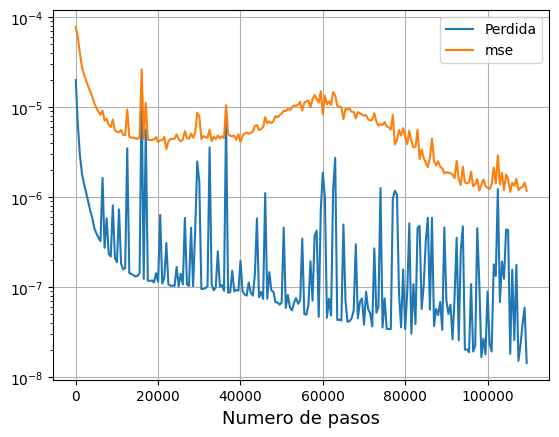

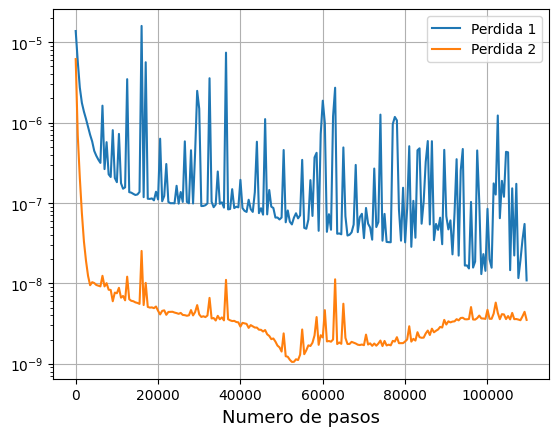

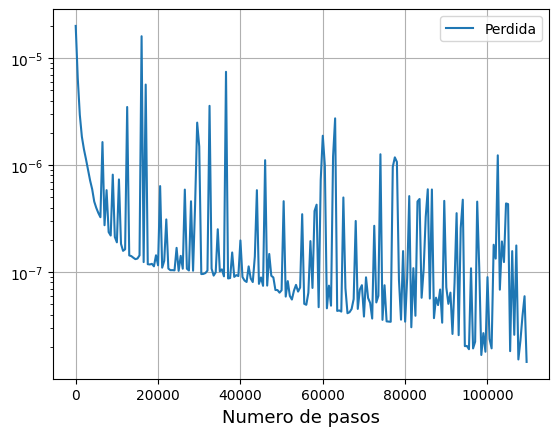

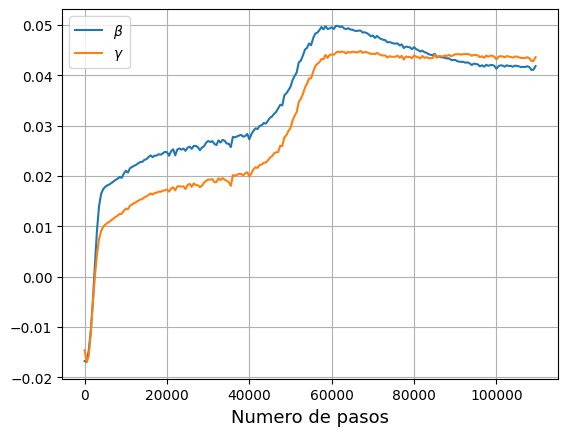

In [17]:
all_steps = np.arange(0, steps, print_steps)

fig33 = plt.figure(33)
plt.plot(all_steps,Alem_loss_history, label="Perdida")
plt.plot(all_steps,Alem_mse_history, label="mse")
plt.xlabel('Numero de pasos',fontsize=13)

plt.yscale('log')
plt.legend()
plt.grid(True) 

fig50 = plt.figure(50)
plt.plot(all_steps,Alem_loss1_history, label="Perdida 1")
plt.plot(all_steps,Alem_loss2_history, label="Perdida 2")
plt.xlabel('Numero de pasos',fontsize=13)

plt.yscale('log')
plt.legend()
plt.grid(True) 

fig51 = plt.figure(51)
plt.plot(all_steps,Alem_loss_history, label="Perdida")
plt.yscale('log')
plt.xlabel('Numero de pasos',fontsize=13)

plt.legend()
plt.grid(True) 

fig60 = plt.figure(60)
plt.plot(all_steps,Alem_beta_history, label=r"$\beta$")
plt.plot(all_steps,Alem_gamma_history, label=r"$\gamma$")
plt.xlabel('Numero de pasos',fontsize=13)

plt.legend()
plt.grid(True) 

#find the index of min loss
min_loss_index = np.argmin(Alem_loss_history)
print('Los mejores valores de beta y gamma son, beta =', Alem_beta_history[min_loss_index], ', gamma =', Alem_gamma_history[min_loss_index])